# Assignment 3 - The gender wage gap?

*Capucine DAVID, Mathilde FUNCK BRENTANO, Raphaela LITZEL, Marrec SELOUS*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
rawdata = pd.read_excel('/content/drive/MyDrive/Data science for public policy/'
                       + 'WMD - Assignment 3/IPUMS 2013.xlsx')

In [ ]:
rawdata.head()

,YEAR,SERIAL,MONTH,PERNUM,CPSIDP,ASECWT,AGE,SEX,RACE,BPL,CITIZEN,EMPSTAT,OCC,CLASSWKR,UHRSWORKT,UHRSWORK1,EDUC,OCCLY,INCWAGE
0,2013,3,3,1,20111202867901,616.97,57,1,100,9900,1,32,0,0,999,0,73,0,0
1,2013,5,3,1,20111202855001,591.14,45,2,100,9900,1,10,9120,21,38,38,81,9120,22000
2,2013,5,3,2,20111202855002,591.14,40,1,100,9900,1,10,7220,28,40,40,91,7220,26000
3,2013,5,3,3,20111202855003,514.79,66,1,100,9900,1,32,0,0,999,0,50,0,0
4,2013,7,3,1,20120102879101,613.14,59,1,100,9900,1,12,6230,13,997,0,73,6230,0


In [ ]:
rawdata.describe()

,YEAR,SERIAL,MONTH,PERNUM,CPSIDP,ASECWT,AGE,SEX,RACE,BPL,CITIZEN,EMPSTAT,OCC,CLASSWKR,UHRSWORKT,UHRSWORK1,EDUC,OCCLY,INCWAGE
count,202634.0,202634.000000,202634.0,202634.000000,2.026340e+05,202634.000000,202634.000000,202634.000000,202634.000000,202634.000000,202634.000000,202634.000000,202634.000000,202634.000000,202634.000000,202634.000000,202634.000000,202634.000000,2.026340e+05
mean,2013.0,50333.840486,3.0,2.280733,1.296322e+13,1535.360157,35.535340,1.514869,167.065557,13428.277668,1.482066,14.902953,2048.078526,10.415113,598.898003,16.109301,63.509964,2094.959563,2.334763e+06
std,0.0,28442.142454,0.0,1.400228,9.634296e+12,952.607327,22.316442,0.499780,170.120161,10549.457027,1.213719,13.086888,2756.337767,10.852988,473.242031,20.382780,41.015525,2784.161071,4.205764e+06
min,2013.0,3.000000,3.0,1.000000,0.000000e+00,70.190000,0.000000,1.000000,100.000000,9900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00
25%,2013.0,25563.000000,3.0,1.000000,0.000000e+00,792.372500,16.000000,1.000000,100.000000,9900.000000,1.000000,10.000000,0.000000,0.000000,40.000000,0.000000,20.000000,0.000000,0.000000e+00
50%,2013.0,50528.500000,3.0,2.000000,2.012011e+13,1488.470000,35.000000,2.000000,100.000000,9900.000000,1.000000,10.000000,0.000000,0.000000,999.000000,0.000000,73.000000,0.000000,2.700200e+04
75%,2013.0,75386.000000,3.0,3.000000,2.013010e+13,1964.430000,53.000000,2.000000,100.000000,9900.000000,1.000000,32.000000,4220.000000,21.000000,999.000000,40.000000,91.000000,4230.000000,1.300000e+05
max,2013.0,98095.000000,3.0,16.000000,2.013031e+13,12794.080000,85.000000,2.000000,830.000000,96000.000000,5.000000,36.000000,9840.000000,29.000000,999.000000,99.000000,125.000000,9840.000000,9.999999e+06


## Question 1

Filter the data: only retain people that currently have a job as an Employee (EMPSTAT = 10; CLASSWKR = (20, 21, 22, 23, 24, 25, 27, 28)).

In [ ]:
# First just keep individuals who have a job as an employee

filtered = rawdata[rawdata['EMPSTAT'] == 10]

In [ ]:
# Check, worked!

filtered['EMPSTAT'].unique()

array([10])

In [ ]:
# Second filter for specific class of worker

data = filtered[
                (filtered['CLASSWKR'] >= 20) &
                (filtered['CLASSWKR'] != 26) &
                (filtered['CLASSWKR'] <= 28)
]

In [ ]:
# Check

filtered['CLASSWKR'].unique()

array([21, 28, 27, 13, 25, 14, 29])

In [ ]:
# Worked!

data['CLASSWKR'].unique()

array([21, 28, 27, 25])

## Question 2

Recode your variables. You might also want to rename them.

### Rename columns

In [ ]:
current_cols = list(data.columns)
current_cols

['YEAR',
 'SERIAL',
 'MONTH',
 'PERNUM',
 'CPSIDP',
 'ASECWT',
 'AGE',
 'SEX',
 'RACE',
 'BPL',
 'CITIZEN',
 'EMPSTAT',
 'OCC',
 'CLASSWKR',
 'UHRSWORKT',
 'UHRSWORK1',
 'EDUC',
 'OCCLY',
 'INCWAGE']

In [ ]:
# Rename the columns

new_cols = ['year',
            'household_id',
            'month',
            'within_household_id',
            'across_samples_id',
            'person_level_weight', # weight used to account for sampling biases
            'age',
            'sex',
            'race',
            'birthplace',
            'citizenship_status',
            'employment_status',
            'occupation',
            'class_of_worker',
            'workhours_week_alljobs',
            'workhours_week_mainjob',
            'education',
            'occupation_last_year',
            'income'] # total income received from wages or salary, tips,
                      # commissions, or bonuses during the current calendar year

data.columns = new_cols
data.head()

,year,household_id,month,within_household_id,across_samples_id,person_level_weight,age,sex,race,birthplace,citizenship_status,employment_status,occupation,class_of_worker,workhours_week_alljobs,workhours_week_mainjob,education,occupation_last_year,income
1,2013,5,3,1,20111202855001,591.14,45,2,100,9900,1,10,9120,21,38,38,81,9120,22000
2,2013,5,3,2,20111202855002,591.14,40,1,100,9900,1,10,7220,28,40,40,91,7220,26000
6,2013,9,3,1,20120102865101,656.54,62,2,100,9900,1,10,3255,21,40,40,111,3255,45000
7,2013,9,3,2,20120102865102,656.54,63,1,100,9900,1,10,2310,27,40,40,111,2310,6000
8,2013,10,3,1,20120102894101,347.43,30,1,100,9900,1,10,7220,21,997,0,73,7220,40000


### Delete variables

Let's delete the following variables:

- 'across_samples_id' (because we will be focusing only on the IPUMS 2013 dataset)
- 'month' and 'year' (because the only month is March and the only year is 2013 and the timing of the survey is not that relevant for our analysis)
- 'household_id' (because we are interested in individual-level only)
- 'within_household_id' (again, because we are not interested in household-level)
- 'employement_status' (because we already filtered so that everyone in the dataset is employed)
- 'occupation_last_year' (because it contains information on employment the previous year, and we are not going to be looking at differences between years. thus we only need 'occupation' which references occupation in the current year. See: https://cps.ipums.org/cps-action/variables/OCCLY#description_section)

In [ ]:
data = data.drop(columns = ['across_samples_id',
                            'month', 'year',
                            'household_id',
                            'within_household_id',
                            'employment_status',
                            'occupation_last_year',])
data.head()

,person_level_weight,age,sex,race,birthplace,citizenship_status,occupation,class_of_worker,workhours_week_alljobs,workhours_week_mainjob,education,income
1,591.14,45,2,100,9900,1,9120,21,38,38,81,22000
2,591.14,40,1,100,9900,1,7220,28,40,40,91,26000
6,656.54,62,2,100,9900,1,3255,21,40,40,111,45000
7,656.54,63,1,100,9900,1,2310,27,40,40,111,6000
8,347.43,30,1,100,9900,1,7220,21,997,0,73,40000


### Recode sex

Let's start by categorizing the sex variable into male and female. (See: https://cps.ipums.org/cps-action/variables/SEX#codes_section)

In [ ]:
# According to the IPUMS guide, 1 is coded as male and 2 is coded as female.

data['sex'].unique()

array([2, 1])

In [ ]:
data['sex'] = data['sex'].replace(
    {1: 'Male',
     2: 'Female',}
     )

In [ ]:
# Check, worked!

data['sex'].unique()

array(['Female', 'Male'], dtype=object)

### Recode citizenship status

Next, let's assign meaningful labels to the 5 categories of citizenship status. (See: https://cps.ipums.org/cps-action/variables/CITIZEN#codes_section)


In [ ]:
data['citizenship_status'].unique()

array([1, 3, 5, 4, 2])

In [ ]:
data['citizenship_status'] = data['citizenship_status'].replace(
    {1: 'U.S. citizen, born in the U.S.',
     3: 'U.S. citizen, born from American parents abroad',
     5: 'Not a U.S. citizen',
     4: 'U.S. citizen, naturalized',
     # Although many people born in the U.S. outlying territories do not have
     # U.S. citizenship, we are assuming here that the existence of the last
     # label is to categorise U.S. citizens who were born in these territories.
     2: 'U.S. citizen, born in the U.S outlying territories'}
     )


In [ ]:
# Check, worked!

data['citizenship_status'].unique()

array(['U.S. citizen, born in the U.S.',
       'U.S. citizen, born from American parents abroad',
       'Not a U.S. citizen', 'U.S. citizen, naturalized',
       'U.S. citizen, born in the U.S outlying territories'], dtype=object)

### Recode class of worker

Let's assign meaningful labels to the 4 classes of worker too. (See: https://cps.ipums.org/cps-action/variables/CLASSWKR#codes_section)

In [ ]:
data['class_of_worker'].unique()

array([21, 28, 27, 25])

In [ ]:
data['class_of_worker'] = data['class_of_worker'].replace(
    {21: 'Private employee',
     28: 'Local government employee',
     27: 'State government employee',
     25: 'Federal government employee'}
     )

In [ ]:
# Check, worked!

data['class_of_worker'].unique()

array(['Private employee', 'Local government employee',
       'State government employee', 'Federal government employee'],
      dtype=object)

### Recode education

We can also recode the variable 'education' into a categorical variable. (See: https://cps.ipums.org/cps-action/variables/EDUC#codes_section)

* None
* Low (Primary: until grades 5 or 6)
* Medium (Secondary: until grade 12, with or without diploma)
* Advanced (Associate's: until 2 years of college)
* High (Undergraduate: until Bachelor´s degree or 6+ years of college)
* Very high (Master's, Professional school degree or Doctorate)


In [ ]:
np.sort(data['education'].unique())

array([  2,  10,  20,  30,  40,  50,  60,  71,  73,  81,  91,  92, 111,
       123, 124, 125])

In [ ]:
# Our bins will encompass the categories outlined above.

data['education'] = pd.cut(data.education,
                           bins = [0, 2, 22, 73, 92, 122, 125],
                           include_lowest = True,
                           labels = ['None',
                                     'Low',
                                     'Medium',
                                     'Advanced',
                                     'High',
                                     'Very high'])

In [ ]:
# Check, worked!

data['education'].unique()

['Advanced', 'High', 'Medium', 'Very high', 'Low', 'None']
Categories (6, object): ['None' < 'Low' < 'Medium' < 'Advanced' < 'High' < 'Very high']

### Recode race

The data for race is expressed in numbers right now and would be more understandable if expressed in english.

In [ ]:
# Let's find the labels in the user guide.

with open('/content/drive/MyDrive/Data science for public policy/'
          + 'WMD - Assignment 3/IPUMS UserGuide 2013.txt') as file:
    lines = file.read().splitlines()
# with open('/content/Assignment 3/IPUMS UserGuide 2013.txt') as file:
#    lines = file.read().splitlines()
lines

['Samples selected:',
 '      IPUMS-CPS, ASEC 2013                              regular',
 'File Type:                    rectangular',
 'Case Selection:               No',
 '  Variable               Columns        Len    03/2013',
 '  YEAR               H   1-4            4      X ',
 '  SERIAL             H   5-9            5      X ',
 '  MONTH              H  10-11           2      X ',
 '  CPSID              H  12-25          14      X ',
 '  ASECFLAG           H  26              1      X ',
 '  ASECWTH            H  27-36          10      X ',
 '  PERNUM             P  37-38           2      X ',
 '  CPSIDP             P  39-52          14      X ',
 '  ASECWT             P  53-62          10      X ',
 '  AGE                P  63-64           2      X ',
 '  SEX                P  65              1      X ',
 '  RACE               P  66-68           3      X ',
 '  BPL                P  69-73           5      X ',
 '  CITIZEN            P  74              1      X ',
 '  MBPL    

In [ ]:
# What section do we need to look at?

print(lines.index(' RACE\t\tRace'))
print(lines.index('999\t\tBlank'))

160
190


In [ ]:
# Let's select it.

race = lines[161:191]
race

['100\t\tWhite',
 '200\t\tBlack/Negro',
 '300\t\tAmerican Indian/Aleut/Eskimo',
 '650\t\tAsian or Pacific Islander',
 '651\t\tAsian only',
 '652\t\tHawaiian/Pacific Islander only',
 '700\t\tOther (single) race, n.e.c.',
 '\t\tTwo or more races',
 '801\t\tWhite-Black',
 '802\t\tWhite-American Indian',
 '803\t\tWhite-Asian',
 '804\t\tWhite-Hawaiian/Pacific Islander',
 '805\t\tBlack-American Indian',
 '806\t\tBlack-Asian',
 '807\t\tBlack-Hawaiian/Pacific Islander',
 '808\t\tAmerican Indian-Asian',
 '809\t\tAsian-Hawaiian/Pacific Islander',
 '810\t\tWhite-Black-American Indian',
 '811\t\tWhite-Black-Asian',
 '812\t\tWhite-American Indian-Asian',
 '813\t\tWhite-Asian-Hawaiian/Pacific Islander',
 '814\t\tWhite-Black-American Indian-Asian',
 '815\t\tAmerican Indian-Hawaiian/Pacific Islander',
 '816\t\tWhite-Black--Hawaiian/Pacific Islander',
 '817\t\tWhite-American Indian-Hawaiian/Pacific Islander',
 '818\t\tBlack-American Indian-Asian',
 '819\t\tWhite-American Indian-Asian-Hawaiian/Pacific I

In [ ]:
# Seperate the numbers into their own list.

codes = []
for code in race:
    if not code.startswith('\t\t'):
        code = code[:3]
        code = int(code)
        codes.append(code)

In [ ]:
# And now the labels.

names = []
for name in race:
    if not name.startswith('\t\t'):
        name = name[5:]
        names.append(name)

In [ ]:
# Bring them together into a dictionary.

race_dict = dict(zip(codes, names))

In [ ]:
# And finally edit our dataset.

data['race'] = data['race'].replace(race_dict)

In [ ]:
# Check, worked!

data['race'].unique()

array(['White', 'Asian only', 'American Indian/Aleut/Eskimo',
       'Black/Negro', 'White-American Indian', 'Black-American Indian',
       'White-Hawaiian/Pacific Islander', 'White-Asian',
       'White-American Indian-Asian', 'White-Black',
       'Hawaiian/Pacific Islander only', 'Black-Asian',
       'White-Black-American Indian',
       'White-Black--Hawaiian/Pacific Islander',
       'Black-Hawaiian/Pacific Islander', 'White-Black-Asian',
       'White-Black-American Indian-Asian', 'American Indian-Asian',
       'Asian-Hawaiian/Pacific Islander',
       'White-Asian-Hawaiian/Pacific Islander',
       'White-American Indian-Hawaiian/Pacific Islander',
       'Four or five races, unspecified', 'Black-American Indian-Asian',
       'American Indian-Hawaiian/Pacific Islander',
       'Two or three races, unspecified'], dtype=object)

### Recode birthplaces

We can run the same process as above, but this time for birthplaces.

In [ ]:
# What section do we need to look at?

print(lines.index(' BPL\t\tBirthplace'))
print(lines.index('99999\t\tNIU'))

192
392


In [ ]:
lines[193:393]

['\t\tUNITED STATES',
 '09900\t\tUnited States, n.s.',
 '\t\tUS OUTLYING AREAS/TERRITORIES',
 '10000\t\tAmerican Samoa',
 '10500\t\tGuam',
 '10750\t\tNorthern Mariana Islands',
 '11000\t\tPuerto Rico',
 '11500\t\tU.S. Virgin Islands',
 '12090\t\tU.S. outlying areas, n.s.',
 '\t\tOTHER NORTH AMERICA',
 '15000\t\tCanada',
 '16010\t\tBermuda',
 '19900\t\tNorth America, n.s.',
 '\t\tCENTRAL AMERICA',
 '20000\t\tMexico',
 '21010\t\tBelize/British Honduras',
 '21020\t\tCosta Rica',
 '21030\t\tEl Salvador',
 '21040\t\tGuatemala',
 '21050\t\tHonduras',
 '21060\t\tNicaragua',
 '21070\t\tPanama',
 '21090\t\tCentral America, n.s.',
 '\t\tCARIBBEAN',
 '25000\t\tCuba',
 '26010\t\tDominican Republic',
 '26020\t\tHaiti',
 '26030\t\tJamaica',
 '26043\t\tBahamas',
 '26044\t\tBarbados',
 '26054\t\tDominica',
 '26055\t\tGrenada',
 '26060\t\tTrinidad and Tobago',
 '26065\t\tAntigua and Barbuda',
 '26070\t\tSt. Kitts--Nevis',
 '26075\t\tSt. Lucia',
 '26080\t\tSt. Vincent and the Grenadi',
 '26091\t\tCaribb

In [ ]:
# Let's go!

birthplace = lines[193:393]

ids = []
for id in birthplace:
    # exceptions to the rules below
    if (id.endswith('United States, n.s.')
    or id.endswith('U.S. outlying areas, n.s.')
    or id.endswith('United Kingdom, n.s.')
    or id.endswith('USSR, n.s.')):
        id_a = id[:5]
        id_a = int(id_a)
        ids.append(id_a)
    # rules to only keep countries from the list
    if (not id.startswith('\t\t') and not id.endswith('n.s.')
    and not id.endswith('n.e.c.') and not id.endswith('Northern Africa')):
        id_b = id[:5]
        id_b = int(id_b)
        ids.append(id_b)

locs = []
for loc in birthplace:
    # exceptions to the rules below
    if (loc.endswith('United States, n.s.')
    or loc.endswith('U.S. outlying areas, n.s.')
    or loc.endswith('United Kingdom, n.s.')
    or loc.endswith('USSR, n.s.')):
        loc_a = loc[7:]
        locs.append(loc_a)
    # rules to only keep countries from the list
    if (not loc.startswith('\t\t') and not loc.endswith('n.s.')
    and not loc.endswith('n.e.c.') and not loc.endswith('Northern Africa')):
        loc_b = loc[7:]
        locs.append(loc_b)

In [ ]:
# Cleanup

locs[:] = [s.replace('United States, n.s.', 'United States') for s in locs]
locs[:] = [s.replace('U.S. outlying areas, n.s.',
                     'United States outlying areas') for s in locs]
locs[:] = [s.replace('Belize/British Honduras', 'Belize') for s in locs]
locs[:] = [s.replace('St. Kitts--Nevis',
                     'Saint Kitts and Nevis') for s in locs]
locs[:] = [s.replace('St. Lucia', 'Saint Lucia') for s in locs]
locs[:] = [s.replace('St. Vincent and the Grenadi',
                     'Saint Vincent and the Grenadines') for s in locs]
locs[:] = [s.replace('Guyana/British Guiana', 'Guyana') for s in locs]
locs[:] = [s.replace('United Kingdom, n.s.', 'United Kingdom') for s in locs]
locs[:] = [s.replace('Montenego', 'Montenegro') for s in locs]
locs[:] = [s.replace('Other USSR/Russia', 'Russia') for s in locs]
locs[:] = [s.replace('USSR, n.s.', 'Russia') for s in locs]
locs[:] = [s.replace('Egypt/United Arab Rep.', 'Egypt') for s in locs]
locs[:] = [s.replace('South Africa (Union of)', 'South Africa') for s in locs]
locs[:] = [s.replace('Zaire', 'Congo') for s in locs]
locs[:] = [s.replace('Other, n.e.c. and unknown', 'Other') for s in locs]

locs

['United States',
 'American Samoa',
 'Guam',
 'Northern Mariana Islands',
 'Puerto Rico',
 'U.S. Virgin Islands',
 'United States outlying areas',
 'Canada',
 'Bermuda',
 'Mexico',
 'Belize',
 'Costa Rica',
 'El Salvador',
 'Guatemala',
 'Honduras',
 'Nicaragua',
 'Panama',
 'Cuba',
 'Dominican Republic',
 'Haiti',
 'Jamaica',
 'Bahamas',
 'Barbados',
 'Dominica',
 'Grenada',
 'Trinidad and Tobago',
 'Antigua and Barbuda',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Argentina',
 'Bolivia',
 'Brazil',
 'Chile',
 'Colombia',
 'Ecuador',
 'Guyana',
 'Peru',
 'Uruguay',
 'Venezuela',
 'Paraguay',
 'Denmark',
 'Finland',
 'Iceland',
 'Norway',
 'Sweden',
 'England',
 'Scotland',
 'Wales',
 'United Kingdom',
 'Ireland',
 'Northern Ireland',
 'Belgium',
 'France',
 'Netherlands',
 'Switzerland',
 'Greece',
 'Italy',
 'Portugal',
 'Azores',
 'Spain',
 'Austria',
 'Czechoslavakia',
 'Slovakia',
 'Czech Republic',
 'Germany',
 'Hungary',
 'Poland',
 'Romania

In [ ]:
# Now let's bring everything together into a dictionary and edit our dataset.

birthplace_dict = dict(zip(ids, locs))
data['birthplace'] = data['birthplace'].replace(birthplace_dict)

In [ ]:
# Check

uniques = data['birthplace'].unique()
uniques

array(['United States', 'Canada', 'Philippines', 'England', 'Guatemala',
       'Germany', 'Argentina', 'Colombia', 'Jamaica', 'Azores',
       'Cambodia', 'Dominica', 'Saudi Arabia', 'El Salvador',
       'Bangladesh', 'Jordan', 'Russia', 'India', 'Yugoslavia', 'Greece',
       'Bulgaria', 'Somalia', 'Austria', 'Afghanistan', 'New Zealand',
       'Spain', 'Peru', 'Venezuela', 'Taiwan', 'Guam', 'Belize', 'Poland',
       'Czechoslavakia', 'Sudan', 'Japan', 'Vietnam', 'Turkey', 'Italy',
       'Ukraine', 60099, 'Sweden', 'Iceland', 'Mexico', 'China', 'Korea',
       'Panama', 'Puerto Rico', 'Bosnia and Herzegovina', 'Albania',
       'Romania', 'U.S. Virgin Islands', 'Liberia', 'Congo', 'Haiti',
       'Norway', 'Ireland', 'Egypt', 'Lebanon', 'United Kingdom',
       'South Korea', 'Iran', 'Brazil', 'Croatia', 'Thailand', 'Other',
       'Dominican Republic', 'Portugal', 'Kuwait', 'France', 'Barbados',
       'Scotland', 'Indonesia', 'Finland', 'Netherlands', 'Ghana',
       'Bhutan', 

In [ ]:
# Looks like by deleting a few locations in our dictionary, we are left with
# some leftover birthplaces. Let's see which ones specifically.

trash = []
for i in uniques:
    if type(i) is int:
        trash.append(i)
trash

[60099, 59900, 26091, 30090, 31000, 49900]

In [ ]:
# The country code for 'other' is 96000. Let's assign these birthplaces to
#'other' in a dictionary and edit our dataset.

other = ['Other']*len(trash)
trash_dict = dict(zip(trash, other))
data['birthplace'] = data['birthplace'].replace(trash_dict)

In [ ]:
# Check, worked!

for i in data['birthplace'].unique():
    if type(i) is int:
        print('Oh no!')

In [ ]:
# And we barely lost data doo! Only 217 data points marked as 'Other' for
# birthplace.

(data['birthplace'] == 'Other').sum()

217

### Recode occupation

Moving on to categorising occupation. There are so many occupations, we are just going to classify the data according to the 26 major categories. (See: https://usa.ipums.org/usa/volii/occ_acs.shtml)

In [ ]:
# Let's use the same bins strategy as for education.

data['occupation'] = pd.cut(
    data['occupation'],
    bins = [
            0, 10, 425, 426, 500, 800, 1005, 1300, 1600, 2000, 2100, 2200, 2600,
            3000, 3600, 3700, 4000, 4200, 4300, 4700, 5000, 6005, 6200, 6800,
            7000, 7700, 9000, 9800, 10000
            ],
    include_lowest = True,
    right = False,
    labels = [
              'N/A',
              'Management, Business, Science and Arts Occupations',
              'Business Operations Specialists',
              'Management, Business, Science and Arts Occupations',
              'Business Operations Specialists',
              'Financial Specialists',
              'Computer and Mathematical Occupations',
              'Architecture and Engineering Occupations',
              'Life, Physical and Social Science Occupations',
              'Community and Social Services Occupations',
              'Legal Occupations',
              'Education, Training and Library Occupations',
              'Arts, Design, Entertainment, Sports and Media Occupations',
              'Healthcare Practitioners and Technical Occupations',
              'Healthcare Support Occupations',
              'Protective Service Occupations',
              'Food Preparation and Serving Occupations',
              'Building and Grounds Cleaning and Maintenance Occupations',
              'Personal Care and Service Occupations',
              'Sales and Related Occupations',
              'Office and Administrative Support Occupations',
              'Farming, Fishing, and Forestry Occupations',
              'Construction, and Extraction Occupations',
              'Extraction Workers',
              'Installation, Maintenance and Repair Workers',
              'Production Occupations',
              'Transportation and Material Moving Occupations',
              'Military Specific Occupations'
              ],
              ordered = False
)

In [ ]:
# Check, worked!

data['occupation'].unique()

['Transportation and Material Moving Occupations', 'Installation, Maintenance and Repair Workers', 'Healthcare Practitioners and Technical Occupa..., 'Education, Training and Library Occupations', 'Food Preparation and Serving Occupations', ..., 'Computer and Mathematical Occupations', 'Legal Occupations', 'Farming, Fishing, and Forestry Occupations', 'Arts, Design, Entertainment, Sports and Media..., 'Extraction Workers']
Length: 24
Categories (24, object): ['Transportation and Material Moving Occupations', 'Installation, Maintenance and Repair Workers',
                          'Healthcare Practitioners and Technical Occupa..., 'Education, Training and Library Occupations', ...,
                          'Legal Occupations', 'Farming, Fishing, and Forestry Occupations',
                          'Arts, Design, Entertainment, Sports and Media..., 'Extraction Workers']

### Remove outliers

Ok, now we can finish by removing any outliers that remain.


In [ ]:
# What are the characteristics of the remaining numerical variables?

data.describe()

,person_level_weight,age,workhours_week_alljobs,workhours_week_mainjob,income
count,79405.000000,79405.000000,79405.000000,79405.000000,7.940500e+04
mean,1564.817772,41.254908,97.615175,36.245677,4.610345e+04
std,976.446096,13.475795,229.729683,13.643961,5.976661e+04
min,98.860000,15.000000,0.000000,0.000000,0.000000e+00
25%,791.730000,30.000000,40.000000,35.000000,1.800000e+04
50%,1507.840000,41.000000,40.000000,40.000000,3.500000e+04
75%,1999.340000,51.000000,43.000000,40.000000,5.800000e+04
max,9349.890000,85.000000,997.000000,99.000000,1.349999e+06


The standard deviation of income relative to the mean is pretty high, but this
is probably explained by the high level of income inequality of our modern
societies, so let's leave the data for income as is.

The stats for age look normal, and person_level_weight is just a weight
assigned for the sample.

There is something strange going on with workhours_week_alljobs, however. The
standard deviation is several times bigger than the mean, and the max value,
997, is an impossible number of hours of work in a week. The max value for
workhours_week_mainjob seems pretty high too, although it could just be
an unfortunate person having to work more than 14 hours a day.

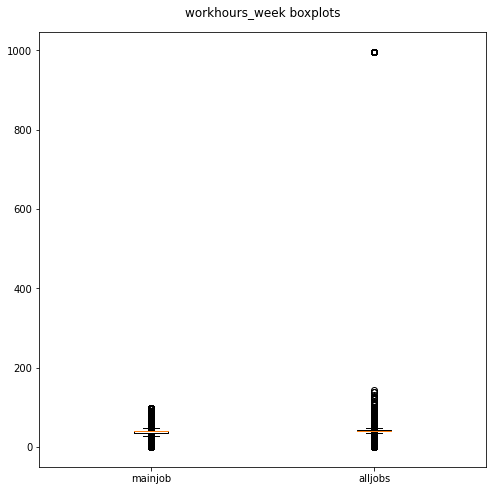

In [ ]:
# Let's draw some boxplots to get a better idea of potential outliers.

plt.figure(figsize = (8, 8))
plt.boxplot([
             data['workhours_week_mainjob'],
             data['workhours_week_alljobs']
             ])
plt.xticks([1, 2], ['mainjob', 'alljobs'])
plt.title('workhours_week boxplots', pad=15)
plt.show()

In [ ]:
# There seems to be one pretty clear outlier for work, the max value 997.

print('Instances of 997 in workhours_week_alljobs : ' +
      str(
          (data['workhours_week_alljobs'] == 997).sum()
          ) + '.')

# Let's see what the next largest value is.

print('Next largest value in workhours_week_alljobs : ' +
      str(
          max(data[data['workhours_week_alljobs'] != 997]
              ['workhours_week_alljobs'])
          ) + '.')

Instances of 997 in workhours_week_alljobs : 4853.
Next largest value in workhours_week_alljobs : 144.


Seems more accurate, although still some of these numbers are insanely high! 144 hours a week is more than 20 hours of work a day.

Looking into the documentation for workhours_week_alljobs (See: https://cps.ipums.org/cps-action/variables/UHRSWORKT#codes_section) we find that 997
actually represents a variable amount of hours worked in a week. Because this
information may actually be useful, let's keep these datapoints for now, but remember to exclude 997 in future analyses when appropriate.

For workhours_week_mainjob, 99 just represents 99 hours worked a week or more. (See: https://cps.ipums.org/cps-action/variables/UHRSWORK1#codes_section)

In [ ]:
# Mean and standard deviation ratio looks acceptable here

data[data['workhours_week_alljobs'] != 997]['workhours_week_alljobs'].describe()

count    74552.000000
mean        39.069267
std         11.294196
min          0.000000
25%         40.000000
50%         40.000000
75%         40.000000
max        144.000000
Name: workhours_week_alljobs, dtype: float64

### Reset index

Lastly, let's reset our dataset index.

In [ ]:
# Looking good!

data = data.reset_index(drop = True)
data

,person_level_weight,age,sex,race,birthplace,citizenship_status,occupation,class_of_worker,workhours_week_alljobs,workhours_week_mainjob,education,income
0,591.14,45,Female,White,United States,"U.S. citizen, born in the U.S.",Transportation and Material Moving Occupations,Private employee,38,38,Advanced,22000
1,591.14,40,Male,White,United States,"U.S. citizen, born in the U.S.","Installation, Maintenance and Repair Workers",Local government employee,40,40,Advanced,26000
2,656.54,62,Female,White,United States,"U.S. citizen, born in the U.S.",Healthcare Practitioners and Technical Occupat...,Private employee,40,40,High,45000
3,656.54,63,Male,White,United States,"U.S. citizen, born in the U.S.","Education, Training and Library Occupations",State government employee,40,40,High,6000
4,347.43,30,Male,White,United States,"U.S. citizen, born in the U.S.","Installation, Maintenance and Repair Workers",Private employee,997,0,Medium,40000
...,...,...,...,...,...,...,...,...,...,...,...,...
79400,339.38,25,Male,White-American Indian,United States,"U.S. citizen, born in the U.S.",Architecture and Engineering Occupations,Private employee,40,40,High,70000
79401,288.77,49,Male,Asian only,Japan,"U.S. citizen, born from American parents abroad","Life, Physical and Social Science Occupations",State government employee,40,40,Very high,75000
79402,288.77,44,Female,Asian only,Thailand,"U.S. citizen, naturalized","Education, Training and Library Occupations",State government employee,40,40,Very high,70000
79403,339.38,29,Male,White,England,"U.S. citizen, naturalized","Installation, Maintenance and Repair Workers",Private employee,40,40,Very high,70000


## Question 3

Describe the sample: what are the distributions of some of the most meaningful variables in the dataset? Show some charts.

### Age & Sex

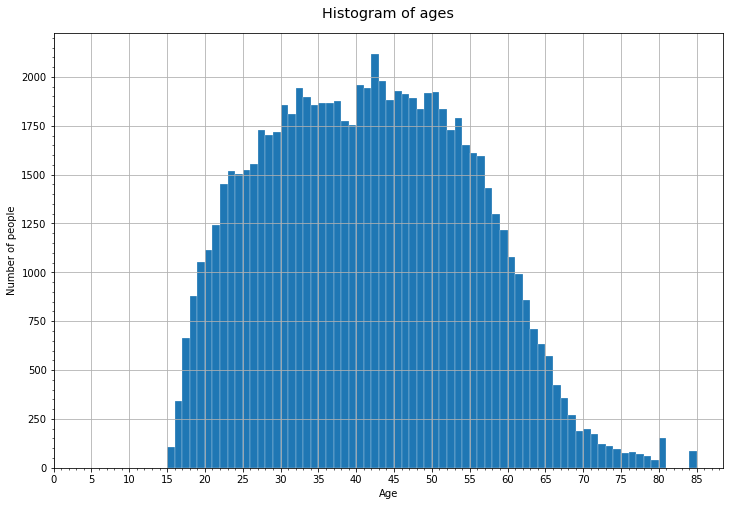

In [ ]:
# Let's plot the histogram of ages.

data['age'].hist(figsize=(12, 8),
                 bins=70,
                 edgecolor='white',
                 linewidth=0.25)

plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Histogram of ages', pad=15, size='x-large')

plt.xticks(np.arange(start=0, stop=90, step=5))
plt.minorticks_on()

plt.show()

The figures on the y axis seem rather small. This is because we are only
plotting the data points of our sample. To get a more accurate idea of the
distribution across the entire population, let's plot the same histogram while
including the weights for each datapoint.

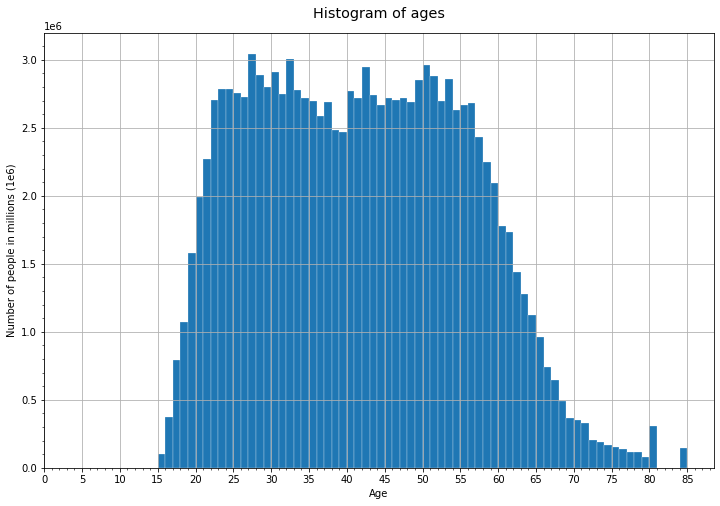

In [ ]:
# Including weights.

data['age'].hist(figsize=(12, 8),
                 bins=70,
                 edgecolor='white',
                 linewidth=0.25,
                 weights=data['person_level_weight'])

plt.xlabel('Age')
plt.ylabel('Number of people in millions (1e6)')
plt.title('Histogram of ages', pad=15, size='x-large')

plt.xticks(np.arange(start=0, stop=90, step=5))
plt.minorticks_on()

plt.show()

There is a noticeable difference between the two histograms. Our data has some
sampling errors that will need to be adjusted for using the person-level
weights when we want to infer from our dataset distributions for the overall
population.


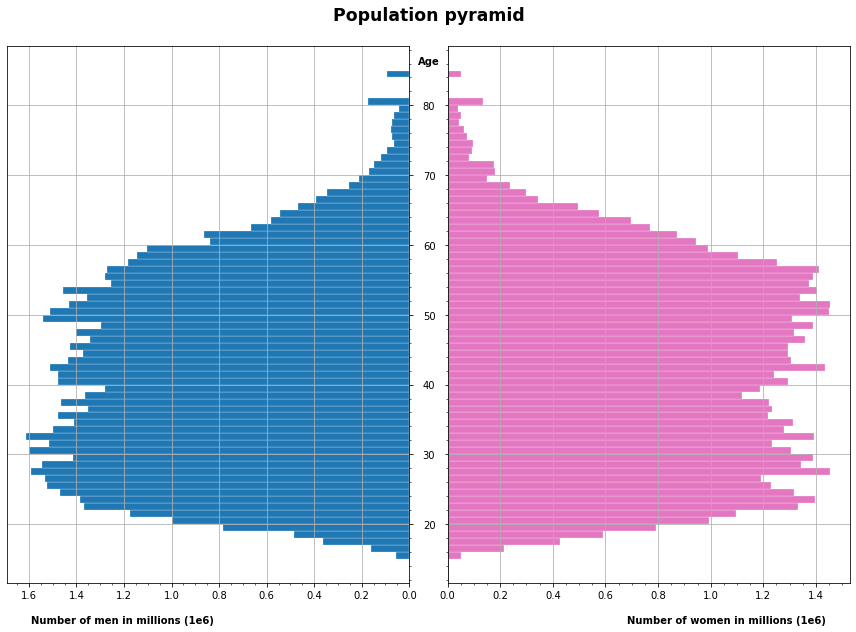

In [ ]:
# Now let's try to make a population pyramid for our sample.

m = data[data['sex'] == 'Male']
w = data[data['sex'] == 'Female']
m_ages = m['age']
w_ages = w['age']

fig, (m_axis, w_axis) = plt.subplots(nrows=1,
                                     ncols=2,
                                     figsize=(12, 8),
                                     sharey=True)
m_axis.invert_xaxis()
m_axis.yaxis.tick_right()

m_axis.hist(m_ages,
            bins=70,
            color='tab:blue',
            edgecolor='white',
            linewidth=0.25,
            weights=m['person_level_weight'],
            orientation='horizontal')

w_axis.hist(w_ages,
            bins=70,
            color='tab:pink',
            edgecolor='white',
            linewidth=0.25,
            weights=w['person_level_weight'],
            orientation='horizontal')

fig.suptitle('Population pyramid',
             y=1.05,
             fontsize='xx-large',
             weight='bold')
fig.text(0.5, 0.95,
         'Age',
         ha='center',
         weight='bold')
fig.text(0.04, -0.02,
         'Number of men in millions (1e6)',
         ha='left',
         weight='bold')
fig.text(0.96, -0.02,
         'Number of women in millions (1e6)',
         ha='right',
         weight='bold')

m_axis.get_xaxis().get_offset_text().set_visible(False)
w_axis.get_xaxis().get_offset_text().set_visible(False)

m_axis.grid(which='major', axis='both')
w_axis.grid(which='major', axis='both')

m_axis.minorticks_on()
w_axis.minorticks_on()

fig.tight_layout()

m_axis.tick_params(axis='y',
                   which='major',
                   pad=10)

plt.show()

Our population has two peaks, one around 50 years old and the other around 30 years old. There's also slightly less women overall, except towards older ages. This is probably because there still isn't quite as many women as men in the workforce (we filtered our data to include only employed individuals.) In all, it resembles a pretty typical population pyramid for an industrialised nation like the U.S.

An important point about weighting our data for making charts: this is not
always convenient. It seems that histograms are the only plots that can be
made (with matplotlib or seaborn) that have an included weights parameter.

For other types of charts, one would have to create a new dataset with each
row multiplied by its respective weight, which would result in an impractical over 120 million rows.

In [ ]:
print('Number of rows of hypothetical weighted dataset : ' +
      str((data['person_level_weight'].sum()) / 10 ** 6) +
      ' million.')

Number of rows of hypothetical weighted dataset : 124.25435522 million.


This problem could probably be solved without having to create a weighted dataset or by using some super RAM-efficient programming, but we were not able to find an easily implementable workaround.

 That's ok; unlike age, most distributions of the variables do not change much when weighting is applied, so we don't always have to use histograms to get a good representation of the overall population.

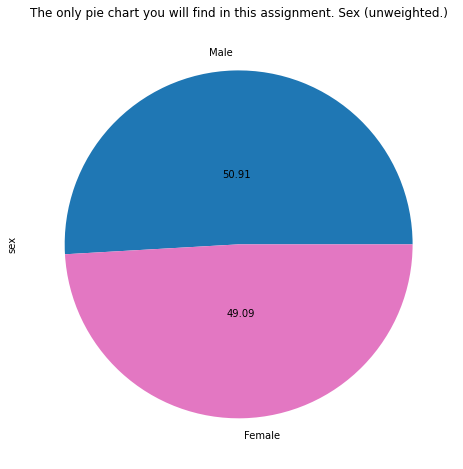

In [ ]:
# We couldn't resist adding this pie chart to demonstrate that bar plots are
# simply superior. There's almost too many bar plots coming up after this,
# though.

data['sex'].value_counts(normalize='sex').plot(kind='pie',
                                               figsize=(16, 8),
                                               colors=['tab:blue', 'tab:pink'],
                                               autopct='%.2f',
                                               pctdistance=0.4)
plt.title('The only pie chart you will find in this assignment. Sex ' +
          '(unweighted.)',
          fontsize = 'large',
          pad = 10)

plt.show()

### Income

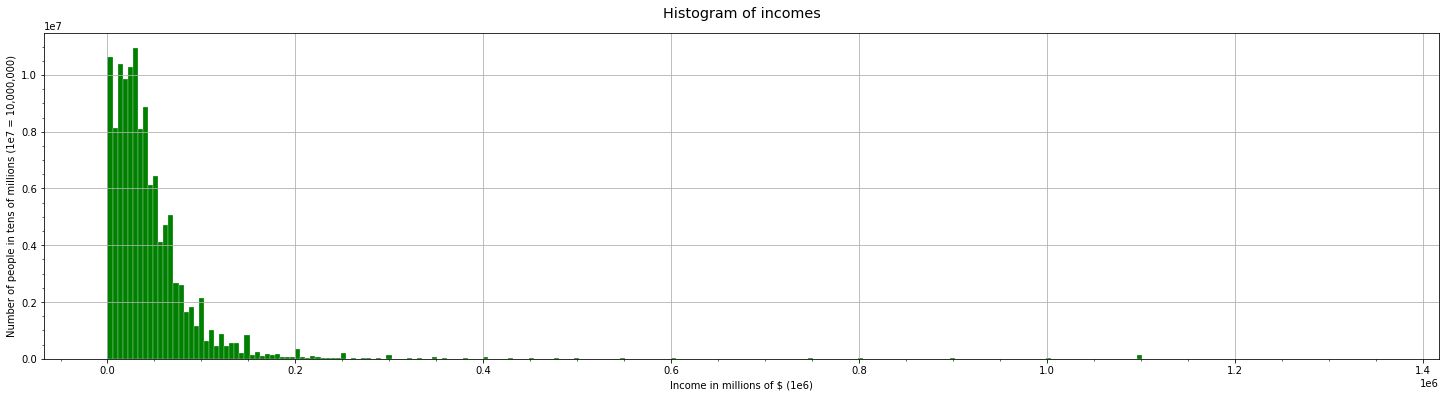

In [ ]:
# Let's see if we can plot the histogram of incomes for our overall population.

data['income'].hist(figsize=(25, 6),
                    bins=250,
                    color='green',
                    edgecolor='white',
                    linewidth=0.25,
                    weights=data['person_level_weight'])
plt.xlabel('Income in millions of $ (1e6)')
plt.ylabel('Number of people in tens of millions (1e7 = 10,000,000)')
plt.title('Histogram of incomes', pad=15, size='x-large')
plt.minorticks_on()
plt.show()

Wow, that's way off the charts! Although most incomes are below the 100,000 figure mark, incomes go all the way to more than a million dollars. Although the number of people with those high incomes doesn't seem to big, so the gini coefficient for the U.S. population is probably not the highest. (Wealth inequality in the U.S. is much higher.)

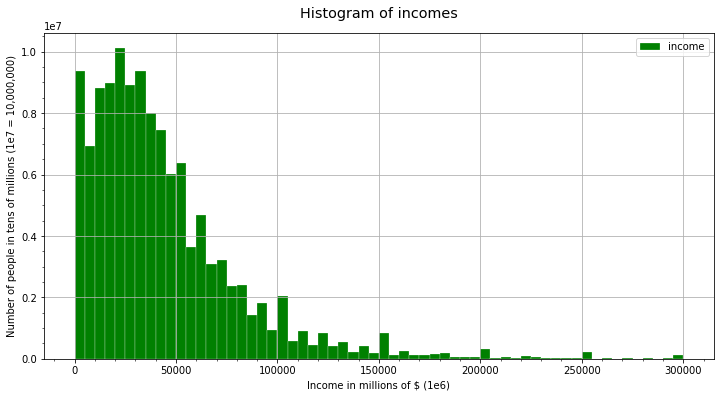

In [ ]:
# Let's focus in on incomes below $300,000.

data['income'].hist(figsize=(12, 6),
                    bins=60,
                    range=(0, 300000),
                    legend='$5000 increments',
                    color='green',
                    edgecolor='white',
                    linewidth=0.25,
                    weights=data['person_level_weight'])
plt.xlabel('Income in millions of $ (1e6)')
plt.ylabel('Number of people in tens of millions (1e7 = 10,000,000)')
plt.title('Histogram of incomes', pad=15, size='x-large')
plt.minorticks_on()
plt.legend()
plt.show()

Interestingly, zooming in reveals that there are spikes in incomes around each major 'milestone' (50, 100, 150, 200, 250 and 300 thousand dollars.) Employees probably negotiate to get those nice round figures!

### Workhours

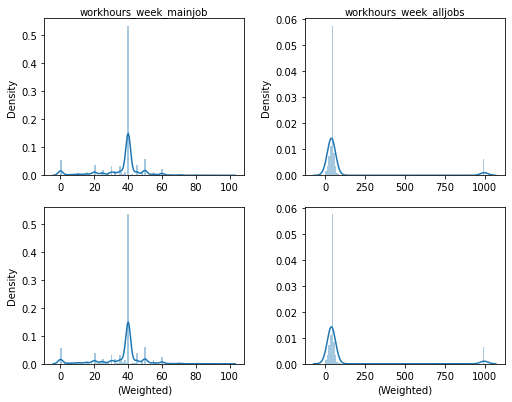

In [ ]:
# As an example why we don't always need to apply weights to make charts of the
# data, let's check if weighting affects workhours much.

import seaborn as sns
# To remove annoying warnings when using sns.distplot.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, ax = plt.subplots(2, 2, figsize=(8, 6))
a1 = sns.distplot(data['workhours_week_mainjob'], bins=100, ax=ax[0, 0])
a2 = sns.distplot(data['workhours_week_mainjob'], bins=100, ax=ax[1, 0],
                  hist_kws={'weights': data['person_level_weight']})
b1 = sns.distplot(data['workhours_week_alljobs'], bins=100, ax=ax[0, 1])
b2 = sns.distplot(data['workhours_week_alljobs'], bins=100, ax=ax[1, 1],
                  hist_kws={'weights': data['person_level_weight']})
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.2)
a1.xaxis.set_label_position('top')
a2.set(xlabel='(Weighted)')
b1.xaxis.set_label_position('top')
b2.set(xlabel='(Weighted)', ylabel=None)
plt.show()

From the above subplots, we can see that weighting does little to change the distributions. Knowing that, let's use unweighted violin plots
instead to get a better idea of workhours.

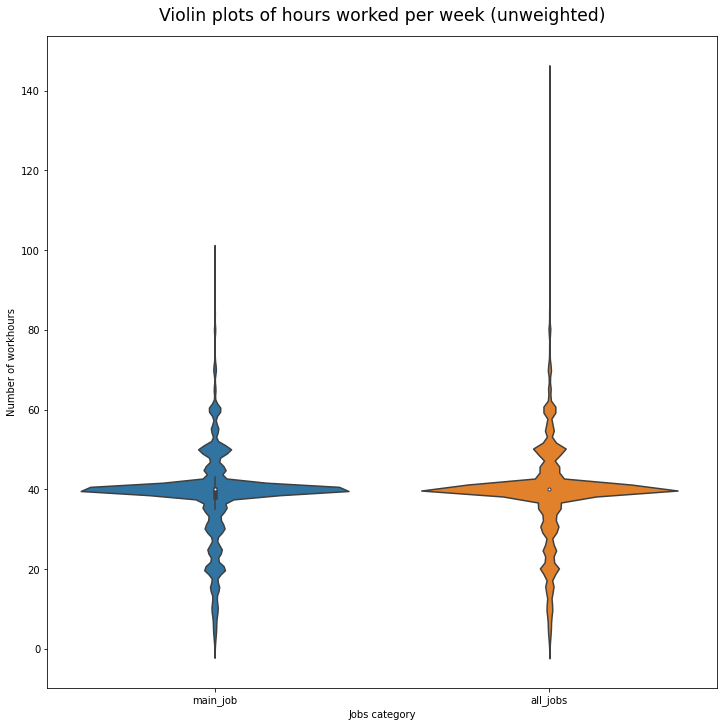

In [ ]:
# We'll exclude datapoints where workhours_week_all_jobs == 997 to get an
# accurate picture.

import seaborn as sns

no_variable = data[data['workhours_week_alljobs'] != 997]
dfviolin = no_variable[['workhours_week_mainjob', 'workhours_week_alljobs']]
dfviolin = dfviolin.rename(columns = {'workhours_week_mainjob' : 'main_job',
                                      'workhours_week_alljobs' : 'all_jobs'})
# Converting from wide form to long form to make side-by-side violin plots
dfviolin = dfviolin.melt(var_name = 'Jobs category',
                         value_name = 'Number of workhours')

plt.figure(figsize = (12, 12))
ax = sns.violinplot(x = 'Jobs category',
                    y = 'Number of workhours',
                    data = dfviolin)
plt.title('Violin plots of hours worked per week (unweighted)',
          fontsize = 'xx-large',
          pad = 15)
plt.show()

They look more like birds than violins! We can see that workhours are heavily clustered around the mean, which is about 40 hours a week, although there are several different other 'groups' along the distribution (at 45, 50 and 60 hours, as well as 35, 30, 25 and 20 hours.)

More people work hours far below the mean than far above the mean, although the amount of people who work maginally more hours looks greater than the amount of people working marginally less.

There doesn't seem to be any major differences between the distribution of working hours for main_jobs and for all_jobs except that all_jobs has more extreme values. This is because the data for main_job is limited at 99 hours.

Now that we know this, we can probably delete the variable 'workhours_week_mainjob' from our dataset as it doesn't really offer extra information.

In [ ]:
# Deleting the column and renaming the remaining one.

data = data.drop('workhours_week_mainjob', axis=1)
data = data.rename(columns = {'workhours_week_alljobs': 'weekly_workhours'})

### Class of worker

**Disclaimer: much of the following bar plots are unweighted. They describes the survey respondents only, not the population they represent, although we assume that the conclusions are globally the same.**

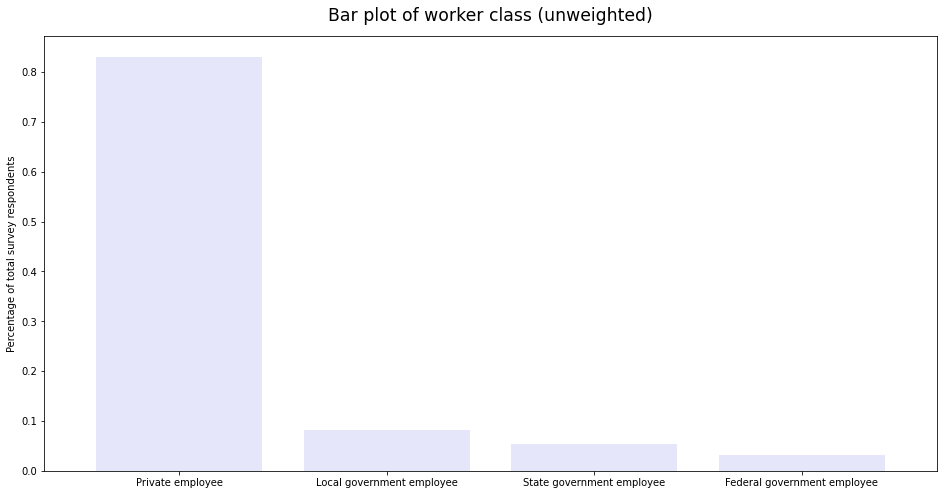

In [ ]:
data['class_of_worker'].value_counts(normalize='class_of_worker').plot(
    kind='bar',
    figsize=(16, 8),
    width = 0.8,
    color='lavender')

plt.ylabel('Percentage of total survey respondents')
plt.title('Bar plot of worker class (unweighted)',
          fontsize = 'xx-large',
          pad = 15)
plt.xticks(rotation=0)

plt.show()

A huge majority of the survey respondents work in the private sector which could increase the wage difference between genders as they are not as regulated as go.

### Occupation

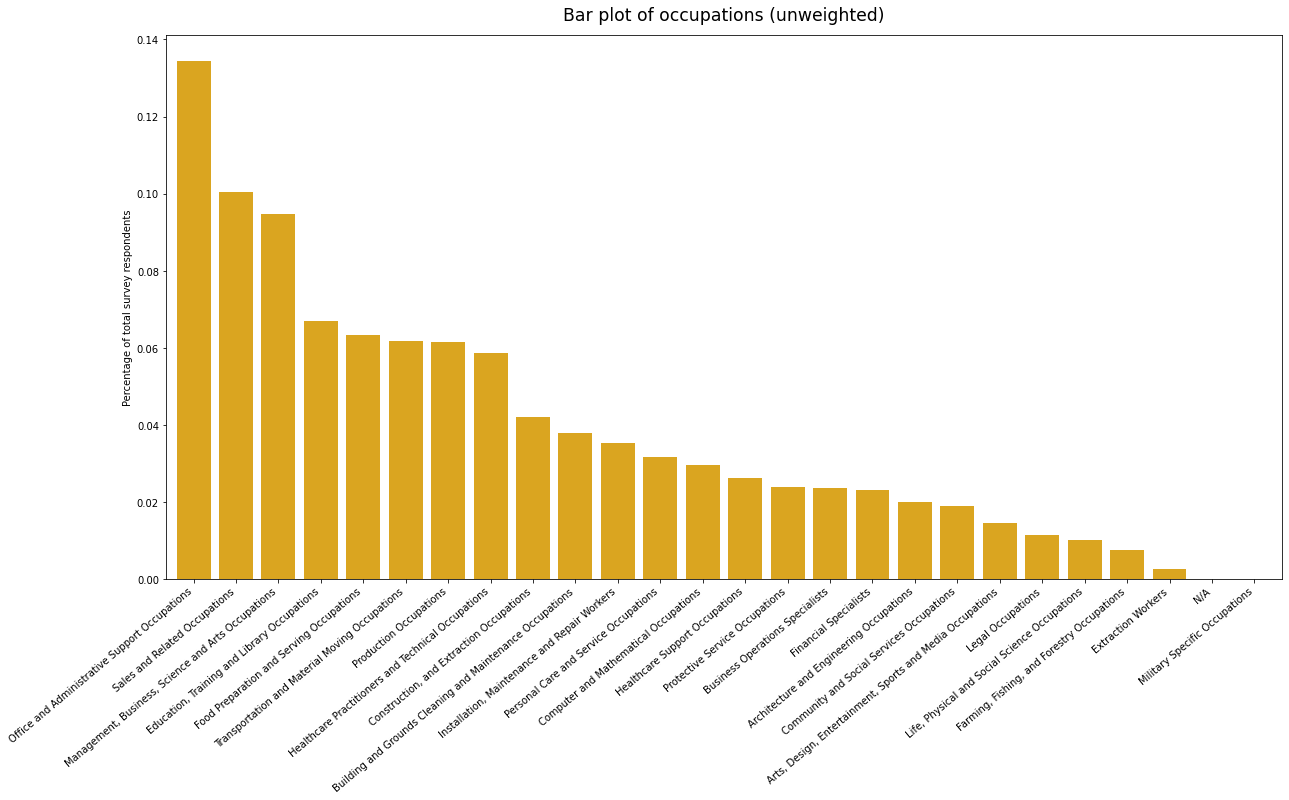

In [ ]:
data['occupation'].value_counts(normalize='occupation').plot(
    kind='bar',
    figsize=(20, 10),
    width = 0.8,
    color='goldenrod')

plt.ylabel('Percentage of total survey respondents')
plt.title('Bar plot of occupations (unweighted)',
          fontsize = 'xx-large',
          pad = 15)
plt.xticks(rotation=40, ha='right')

plt.show()

Unsurprisingly, office jobs, business and sales dominate the upper part of the distribution. Interestingly, though, transportation, industry and construction make a strong showing. Highly specialised fields like sports, law or academia occupy the lower end of the jobs distribution.

The least prevalent area of work amongst survey respondents is extraction. The future doesn't look bright for American coal workers.

### Education

The following piece of code creates an ordered dataframe and was taken from this
stackoverflow post: https://stackoverflow.com/questions/22635110/sorting-the-order-of-bars-in-pandas-matplotlib-bar-plots.

In [ ]:
# Create a dataframe where education is ordered from low to high.
educ = ['None', 'Low', 'Medium', 'Advanced', 'High', 'Very high']
mapping = {ed: i for i, ed in enumerate(educ)}
key = data['education'].map(mapping)
ordered_educ = data.iloc[key.argsort()]

In [ ]:
ordered_educ

,person_level_weight,age,sex,race,birthplace,citizenship_status,occupation,class_of_worker,weekly_workhours,education,income
9778,1340.08,57,Male,White,Dominican Republic,Not a U.S. citizen,"Construction, and Extraction Occupations",Private employee,40,None,20000
26241,636.19,55,Female,Black/Negro,Somalia,"U.S. citizen, naturalized",Production Occupations,Private employee,40,None,22360
20500,1189.14,52,Female,White,Mexico,Not a U.S. citizen,Production Occupations,Private employee,32,None,16800
41555,2501.89,36,Male,White,Mexico,Not a U.S. citizen,Building and Grounds Cleaning and Maintenance ...,Private employee,40,None,19786
63936,1818.34,54,Male,White,Mexico,Not a U.S. citizen,Building and Grounds Cleaning and Maintenance ...,Private employee,38,None,19000
...,...,...,...,...,...,...,...,...,...,...,...
7692,476.67,36,Female,White,United States,"U.S. citizen, born in the U.S.","Education, Training and Library Occupations",Local government employee,40,Very high,50000
48241,1948.08,62,Female,White,United States,"U.S. citizen, born in the U.S.",Community and Social Services Occupations,State government employee,40,Very high,58700
7689,540.92,51,Female,White,United States,"U.S. citizen, born in the U.S.",Business Operations Specialists,Private employee,32,Very high,15152
7700,1045.32,53,Female,White,United States,"U.S. citizen, born in the U.S.",Community and Social Services Occupations,Private employee,50,Very high,48000


In [ ]:
pd.isnull(ordered_educ).any()

person_level_weight    False
age                    False
sex                    False
race                   False
birthplace             False
citizenship_status     False
occupation             False
class_of_worker        False
weekly_workhours       False
education              False
income                 False
dtype: bool

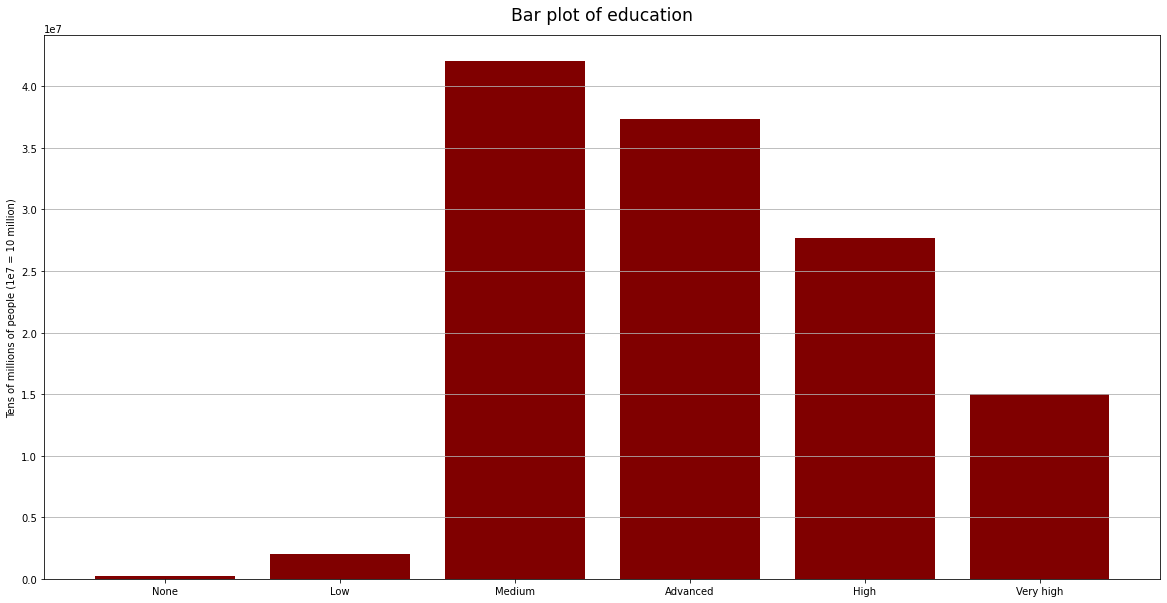

In [ ]:
# Now let's make the bar plot using a histogram.

ordered_educ['education'].hist(figsize=(20, 10),
                               bins=np.arange(7)-0.5,
                               color='maroon',
                               rwidth=0.8,
                               weights=ordered_educ['person_level_weight'])

plt.grid(b=None)
plt.ylabel('Tens of millions of people (1e7 = 10 million)')
plt.title('Bar plot of education',
          fontsize = 'xx-large',
          pad = 15)
plt.grid(axis='y')

plt.show()

The data shows that there is almost full completion of high school, with the amount of people pusuing further education steadily dropping off. There is a plurality of survey respondents who have only completed high school, but it is still impressive how many people actually have completed some college (Advanced, High, or Very high) - a majority.

### Citizenship status

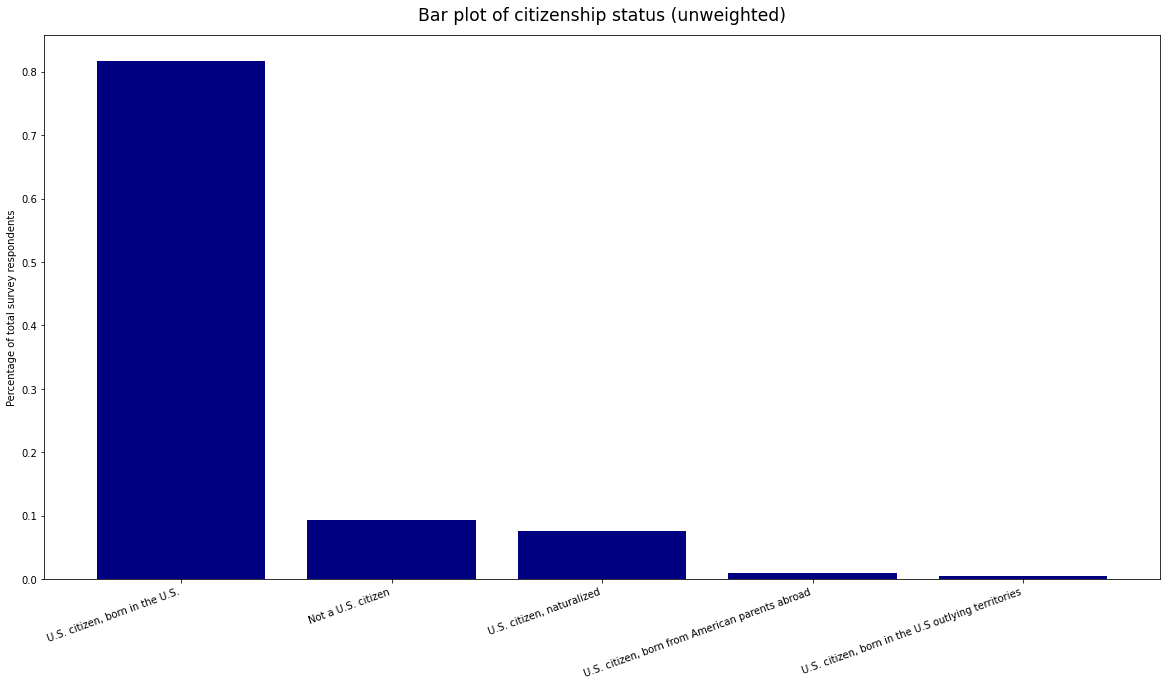

In [ ]:
data['citizenship_status'].value_counts(normalize='citizenship_status').plot(
    kind='bar',
    figsize=(20, 10),
    width = 0.8,
    color='navy')

plt.ylabel('Percentage of total survey respondents')
plt.title('Bar plot of citizenship status (unweighted)',
          fontsize = 'xx-large',
          pad = 15)
plt.xticks(rotation=20, ha='right')

plt.show()

Unsurprisingly, the majority of survey respondents are U.S. citizens, and born in the U.S.

We should note that there are actually more immigrants that are not U.S. citizens than have been naturalised.

### Birthplace

This section's map was created with help from these tutorials:
1. https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
2. https://geopandas.org/mapping.html
3. https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10

In [ ]:
!apt install gdal-bin python-gdal python3-gdal
!apt install python3-rtree
!pip install geopandas
!pip install descartes
!pip install folium
!pip install plotly_express
!pip install geopy
!pip install pycountry

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 16 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 

In [ ]:
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pycountry

In [ ]:
# Create a new dataframe from the birthplace column of the dataset.
locations = pd.DataFrame(data['birthplace'], columns = {'birthplace'})

# The following code is adapted from the first tutorial.

# Define a function that creates a list of 3-character country codes from an
# existing dataframe column of countries
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

# Apply the function to our locations dataframe.
locations['CODE'] = alpha3code(locations['birthplace'])
# Add our weights (i.e. actual estimated birth numbers for each datapoint.)
locations['births'] = data['person_level_weight']
# Aggregate births together so that we only have one instance of each country.
aggregated = locations.groupby(['CODE']).agg({'births': 'sum'})
aggregated = aggregated.reset_index()
# Sorting the values so we can see can get a sneak peek of the map to follow.
sorted = aggregated.sort_values(by=['births'], ascending=False)
sorted

,CODE,births
119,USA,1.022462e+08
79,MEX,6.175504e+06
91,None,2.724038e+06
58,IND,1.257019e+06
95,PHL,9.593677e+05
...,...,...
82,MNG,2.403200e+03
61,ISL,1.963890e+03
88,NOR,1.820350e+03
81,MNE,1.654570e+03


In [ ]:
# Ratio of 'None'

aggregated['births'][91] / sum(aggregated['births'])

0.02192307806979419

It is worth noting that our code could be improved, as we end up classifying around 3,000,000 individuals or about 2% of the dataset population as 'None', making it the third largest 'location' of births.

In [ ]:
# Load our map dataset.

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
# Prepare for the merge.
world = world.rename(columns={'iso_a3': 'CODE'})
# Merge the births dataset onto the world dataset with a left join to generate
# NaN values
world = world.merge(aggregated, on='CODE', how='left')

world

,pop_est,continent,name,CODE,gdp_md_est,geometry,births
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",3.131225e+04
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",3.735036e+05
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1.022462e+08
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",1.061104e+04
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",1.654570e+03
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",1.087945e+05


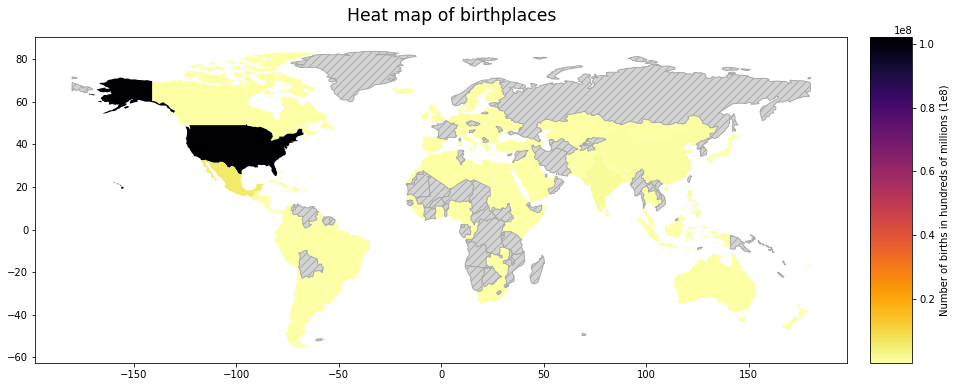

In [ ]:
# Now let's build our map.
# The following code is adapted from the second tutorial.

fig, ax = plt.subplots(figsize = (16, 10))

# Vertically align the plot axes and the legend axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size = '5%', pad = 0.1)

# Remove Antarctica
world = world[world['name'] != 'Antarctica']

world.plot(column = 'births',
           ax = ax,
           legend = True,
           legend_kwds = {'label' : 'Number of births in hundreds of ' +
                          'millions (1e8)'},
           cax = cax,
           cmap = 'inferno_r',
           missing_kwds = {
               "color": "lightgrey",
               "edgecolor": "darkgrey",
               "hatch": "///",
               "label": 'Missing values'}
           )

fig.suptitle('Heat map of birthplaces',
             y = 0.77,
             fontsize = 'xx-large')

plt.show()

We saw previously that most of the survey respondents were citizens born in the United States. Unsurprisingly, the birthplace map is totally dominated by the U.S. Mexico, a major source of immmigration into the U.S, comes in at a distant second.

Let's try and get a better picture of birthplaces outside the U.S. and Mexico by replacing their data with np.nan in the map dataset.

In [ ]:
# Get locations for U.S. and Mexico birth values.
print(np.where(world[['CODE']] == 'USA'))
print(np.where(world[['CODE']] == 'MEX'))
# Get the values.
print(world['births'][4])
print(world['births'][27])
# Check that they are unique for the dataset.
print(np.where(world['births'] == 102246168.13000035))
print(np.where(world['births'] == 6175504.129999995))

(array([4]), array([0]))
(array([27]), array([0]))
102246168.13000035
6175504.129999995
(array([4]),)
(array([27]),)


In [ ]:
# Copy the dataset and replace the values for the U.S. and Mexico with NaN.
no_us_mex = world.copy()
no_us_mex['births'] = no_us_mex['births'].replace(
    [102246168.13000035, 6175504.129999995],
    [np.nan, np.nan]
    )

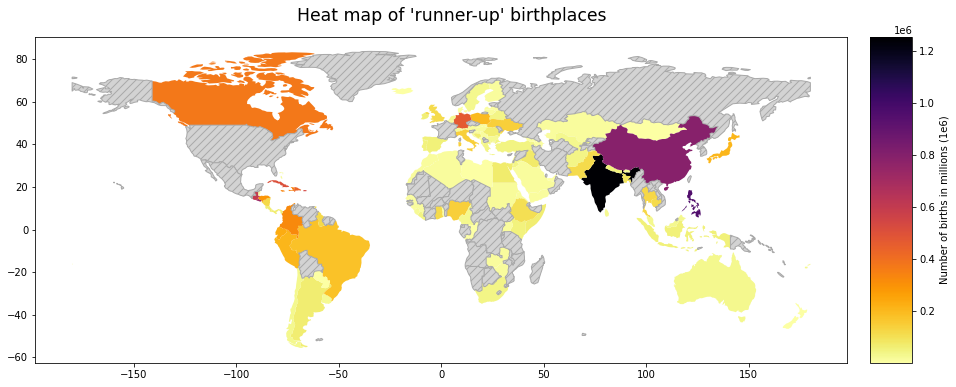

In [ ]:
# Now plot the map without the U.S. and Mexico.

fig, ax = plt.subplots(figsize = (16, 10))

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size = '5%', pad = 0.1)

# Same as previously, but just replacing the world dataset.
no_us_mex.plot(column = 'births',
           ax = ax,
           legend = True,
           legend_kwds = {'label' : 'Number of births in millions (1e6)'},
           cax = cax,
           cmap = 'inferno_r',
           missing_kwds = {
               "color": "lightgrey",
               "edgecolor": "darkgrey",
               "hatch": "///",
               "label": 'Missing values'}
           )

fig.suptitle("Heat map of 'runner-up' birthplaces",
             y = 0.77,
             fontsize = 'xx-large')

plt.show()

Nice map! In the 'runners-up', Canada, Central and South America all appear as important sources of immigration, which can be explained by their geographic proximity.

High-income countries like Germany and Japan, which are important sources of highly-educated labour, also make a strong showing.

But the real story is India, China and the Philippines, which reveal themselves as the biggest sources of immigration after Mexico, probably because they are dynamic countries that are attracted by the U.S. jobs market.   

Because of a few issues with the geopandas dataset, some countries (like France) did not make it onto our map. After all this effort, we see why Tableau is so convenient...

### Race

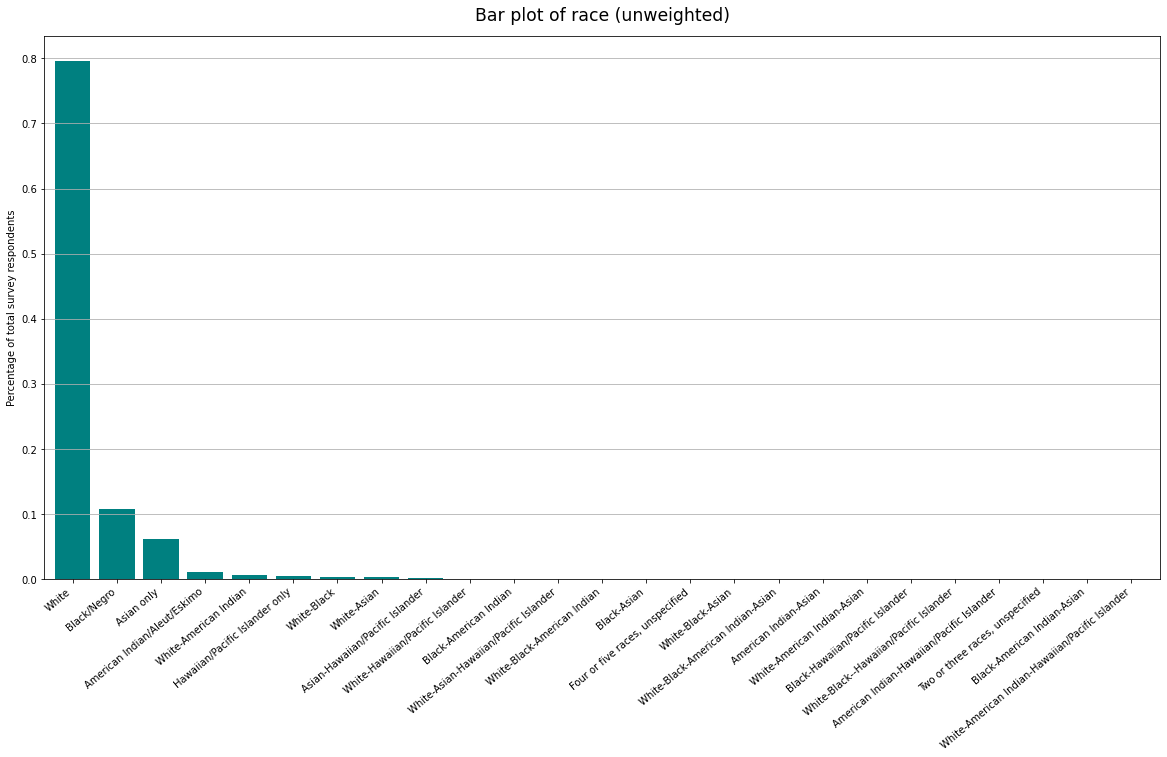

In [ ]:
data['race'].value_counts(normalize='race').plot(
    kind='bar',
    figsize=(20, 10),
    width = 0.8,
    color='teal')

plt.ylabel('Percentage of total survey respondents')
plt.title('Bar plot of race (unweighted)',
          fontsize = 'xx-large',
          pad = 15)
plt.xticks(rotation=40, ha='right')
plt.grid(axis='y')

plt.show()

If whites seem overrepresented among survey respondents, it's in part because hispanics are not being counted seperately in the census data. Hispanics represent about 18.5% of the U.S. population, according to Wikipedia. Even once hispanics are accounted for, though, the white demographic still represents the largest share (60.1%).

In [ ]:
# Let's exclude whites, asians and blacks so we can focus on the rest of the
# minorities.

non_w_b_a = data[(data['race'] != 'White') &
                 (data['race'] != 'Asian only') &
                 (data['race'] != 'Black/Negro')]

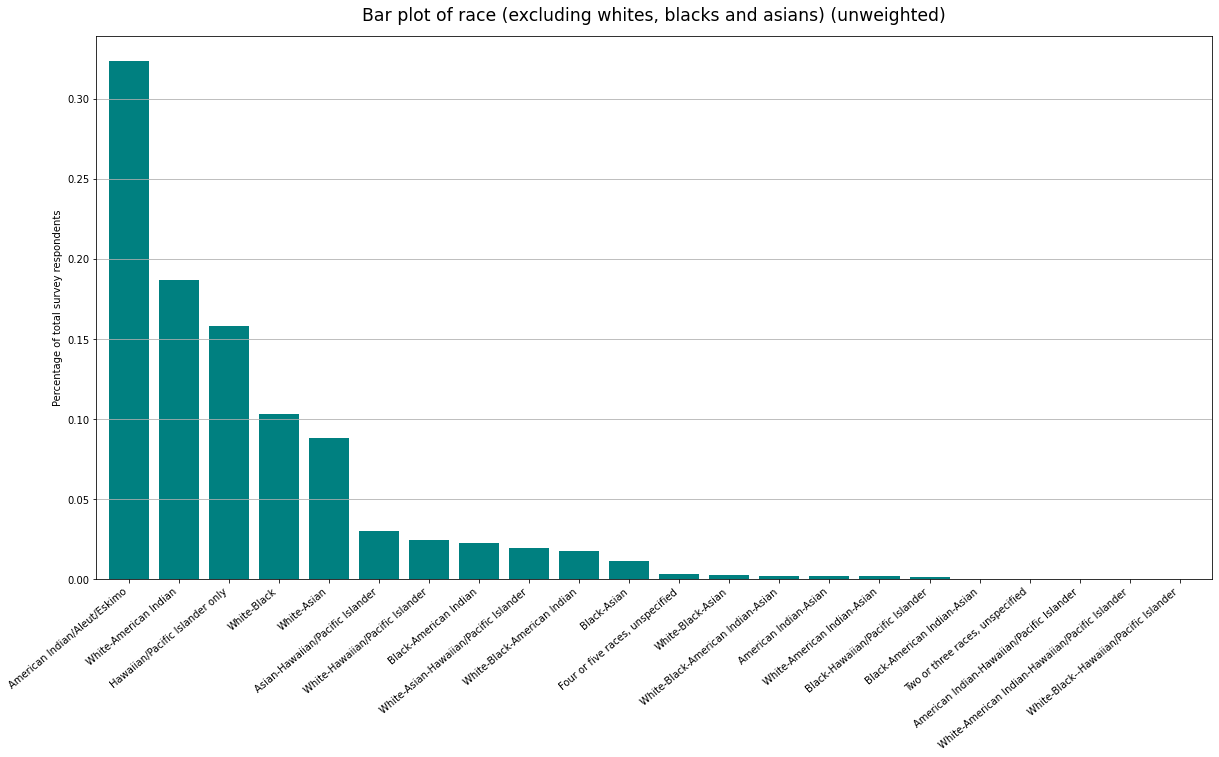

In [ ]:
# Switch out our datasets.
non_w_b_a['race'].value_counts(normalize='race').plot(
    kind='bar',
    figsize=(20, 10),
    width = 0.8,
    color='teal')

plt.ylabel('Percentage of total survey respondents')
plt.title('Bar plot of race (excluding whites, blacks and asians) (unweighted)',
          fontsize = 'xx-large',
          pad = 15)
plt.xticks(rotation=40, ha='right')
plt.grid(axis='y')

plt.show()

Notable is that the two next biggest minorities are Native American (at least part Native American if not fully).

## Question 4
Make a simple analysis: without taking other variables, except ASECWT, into account, are women in the sample paid less than men? Show a chart and interpret the results.

Let's build a histogram that compares men and women's incomes side by side so we can get a general idea of how the distributions match up.

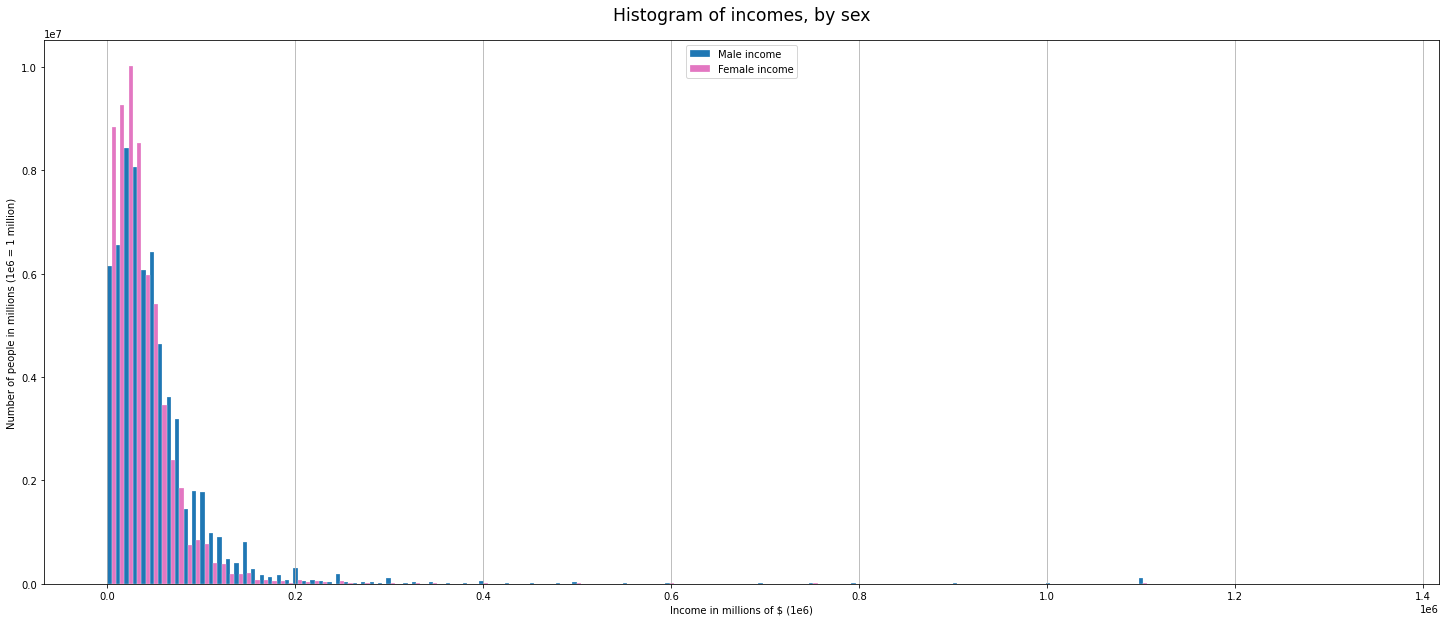

In [ ]:
male = data[data['sex'] == 'Male']
male_income = male['income']
female = data[data['sex'] == 'Female']
female_income = female['income']

# To surpress an annoying warning.
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

plt.figure(figsize=(25, 10))
plt.hist([male_income, female_income],
         # Bin number chosen as a balance between granularity and readability
         bins=150,
         color=['tab:blue', 'tab:pink'],
         label=['Male income', 'Female income'],
         edgecolor='white',
         linewidth=0.25,
         rwidth=1,
         weights=[male['person_level_weight'], female['person_level_weight']])

plt.xlabel('Income in millions of $ (1e6)')
plt.ylabel('Number of people in millions (1e6 = 1 million)')
plt.title('Histogram of incomes, by sex', pad=20, size='xx-large')
plt.legend(loc='upper center')

plt.grid(axis='x')

plt.show()

We can already see that women are predominant in the lower end of the income distribution, while as incomes grow men start to dominate.

The phenomenon seems even more pronounced for the very high incomes (above $200,000), although it is difficult to make out.

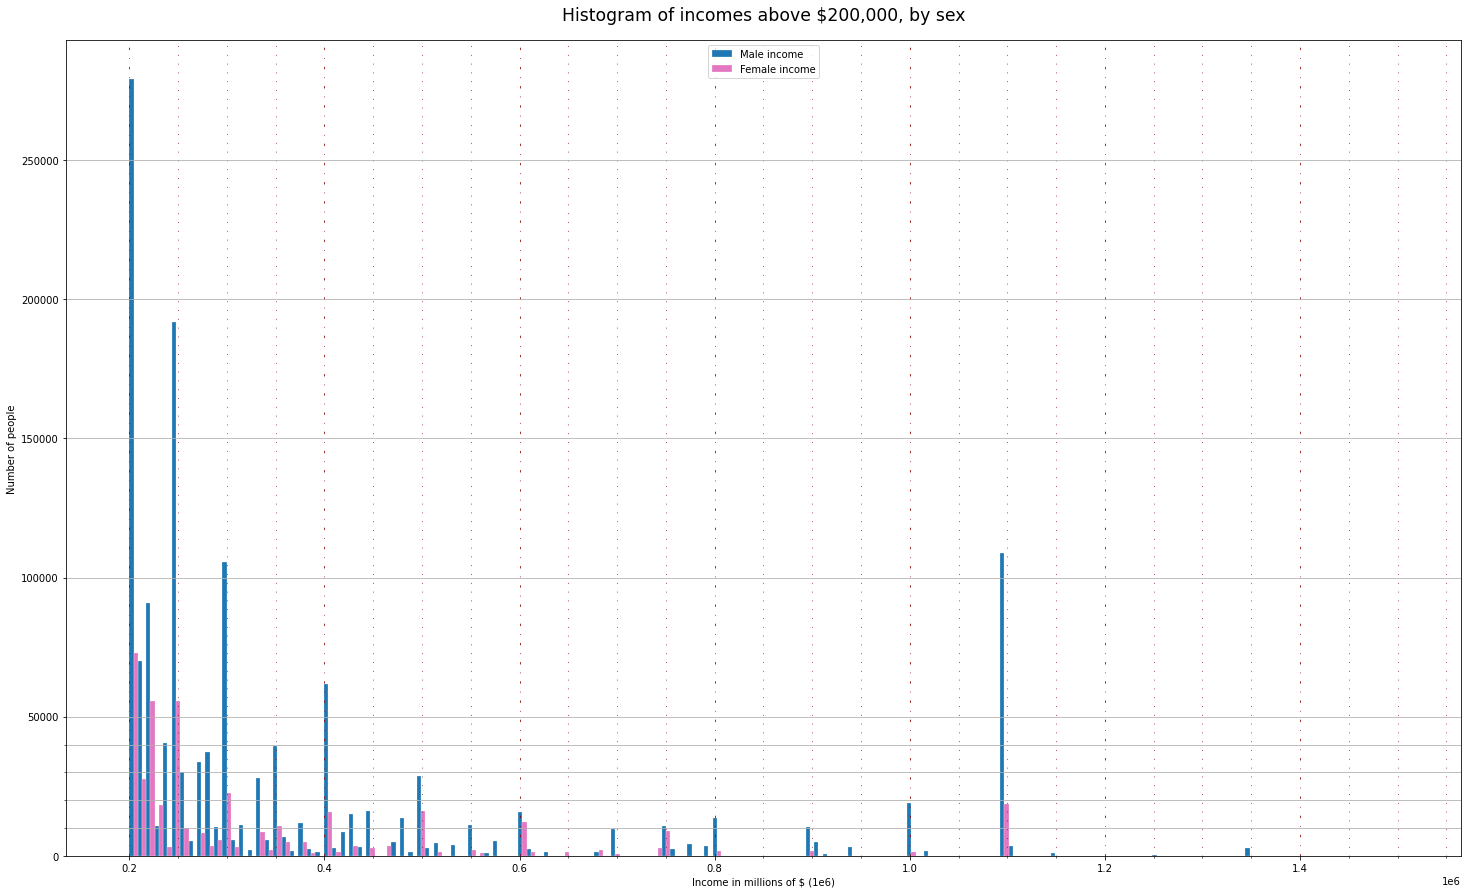

In [ ]:
# Let's zoom in to get a better picture.

# Y-axis stretched out to amplify small values
plt.figure(figsize=(25, 15))
plt.hist([male_income, female_income],
         bins=150,
         # Constrained range to amplify long tail of distribution
         range=(200000, 1500000),
         color=['tab:blue', 'tab:pink'],
         label=['Male income', 'Female income'],
         edgecolor='white',
         linewidth=0.25,
         rwidth=1,
         weights=[male['person_level_weight'], female['person_level_weight']])

plt.xlabel('Income in millions of $ (1e6)')
plt.ylabel('Number of people')
plt.title('Histogram of incomes above $200,000, by sex', pad=20, size='xx-large')
plt.legend(loc='upper center')

# Setting up grid lines
ax = plt.gca()
ax.set_yticks(range(0, 300000, 50000), minor=False)
ax.set_yticks(range(0, 50000, 10000), minor=True)
ax.set_xticks(range(200000, 1600000, 200000), minor=False)
ax.set_xticks(range(200000, 1600000, 50000), minor=True)
ax.yaxis.grid(True, which='major')
ax.yaxis.grid(True, which='minor')
ax.xaxis.grid(True, which='major',
              linestyle=(0, (3, 10, 1, 10)),
              color='darkred')
ax.xaxis.grid(True, which='minor',
              linestyle=(0, (1, 10)),
              color='darkred')

plt.show()

Looking here at the long tail of the distribution, we can see that top incomes are completely dominated by men.

Let's compute the difference between men and women in weighted averages of income.

In [ ]:
wa_income_men = (
    sum(
        data[data['sex'] == 'Male']['income'] *
        data[data['sex'] == 'Male']['person_level_weight']
        )
    /
    sum(
        data[data['sex'] == "Male"]['person_level_weight']
        )
)

wa_income_women = (
    sum(
        data[data['sex'] == 'Female']['income'] *
        data[data['sex'] == 'Female']['person_level_weight']
        )
    /
    sum(
        data[data['sex'] == "Female"]['person_level_weight']\
        )
)

diff_income_sex = wa_income_men - wa_income_women
diff_income_sex

17390.036347987174

On average, men make about 17390 dollars more than women.

The difference in average income between men and women is significant. But does it really stand up to a deeper analysis? Maybe there are other confounding variables that explain why women, as a group, earn less than men. Let's explore what these potential confounders could be in the following question.

## Question 5
Think intuitively about potential confounders and show their relationship with gender and wages visually and/or using pivot tables.

In [ ]:
# Function to generate a pivot table for a specific variable in our dataset.

def pivoter(variable):
    # Our first type of pivot, adding up population numbers by sex for each
    # category of a specific variable
    pivot1 = pd.pivot_table(data,
                            values='person_level_weight',
                            index=variable,
                            columns=['sex'],
                            aggfunc=np.sum,
                            fill_value=0)
    # Our second type of pivot, calculating weighted averages of income for each
    # category of a specific variable
    pivot2 = pd.pivot_table(data,
                            values='income',
                            index=variable,
                            # The lambda function used here to compute weighted
                            # averages was provided by this kind soul over at
                            # stackoverflow: https://stackoverflow.com/questions/65616374/pandas-pivot-table-calculate-weighted-averages-through-aggfunc
                            aggfunc=lambda rows: np.average(rows, weights=data.loc[rows.index, 'person_level_weight']),
                            fill_value=0)
    # Next, fuse our pivot tables. This function is defined later
    pivot = fuse(pivot1, pivot2)
    # Rename our columns for clarity
    pivot = pivot.rename(columns={'Female': 'number of women',
                                  'Male': 'number of men',
                                  'income': 'average income'})
    # Create a surplus men column to better see the difference in numbers
    pivot['surplus men'] = pivot['number of men'] - pivot['number of women']
    # Sort by income for ease of analysis
    pivot = pivot.reindex(pivot.sort_values(by='average income',
                                            ascending=False).index)
    return pivot

In [ ]:
# Three functions to make our pivot tables easy to read.

# Function formatter to add commas in our numbers
def formatter(x):
    try:
        return '{:,}'.format(round(x))
    except:
        return np.nan
print(formatter(5000.098))
print(formatter('None'))

# Function to quickly apply formatter to our pivot tables
def legible(pivot):
    l_pivot = pivot.copy()
    l_pivot['number of women'] = l_pivot['number of women'].apply(formatter)
    l_pivot['number of men'] = l_pivot['number of men'].apply(formatter)
    l_pivot['average income'] = l_pivot['average income'].apply(formatter)
    l_pivot['surplus men'] = l_pivot['surplus men'].apply(formatter)
    return l_pivot

# Function to fuse our pivot tables
def fuse(pivot1, pivot2):
    return pd.concat([pivot for pivot in [pivot1, pivot2]], axis=1)

5,000
nan


### Confounder? Age

Let's first visualise how income varies with age.

In [ ]:
age_pivot = pivoter('age')

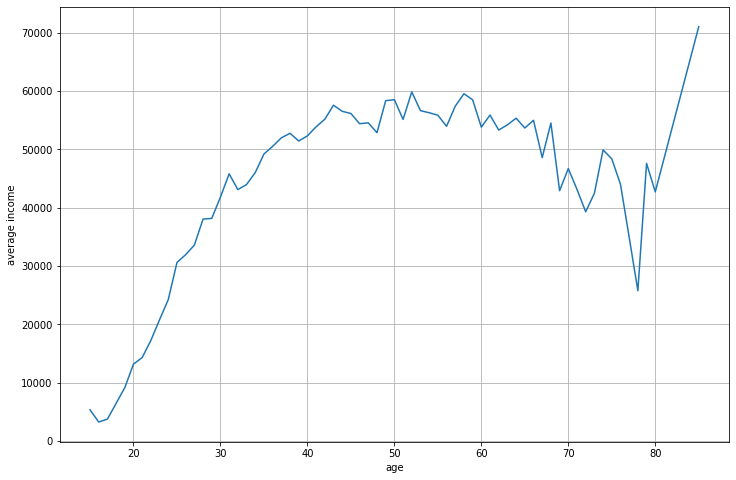

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=age_pivot.index,
             y='average income',
             data=age_pivot)
ax.grid(True)
plt.show()

Income steadily increases with age until around 45 when the income curves reaches a plateau, fluctuating around 55000 dollars. Then, income decreases with retirement around 65. Around 80 there is an increase in income, this probably reflects the fact that people still working long past retirement age are probably exercising high-status, capital-controlling jobs (e.g. Warren Buffet).

Now let's use this knowledge and a graph representing the number of men and women in the workforce according to age to draw further inferences.

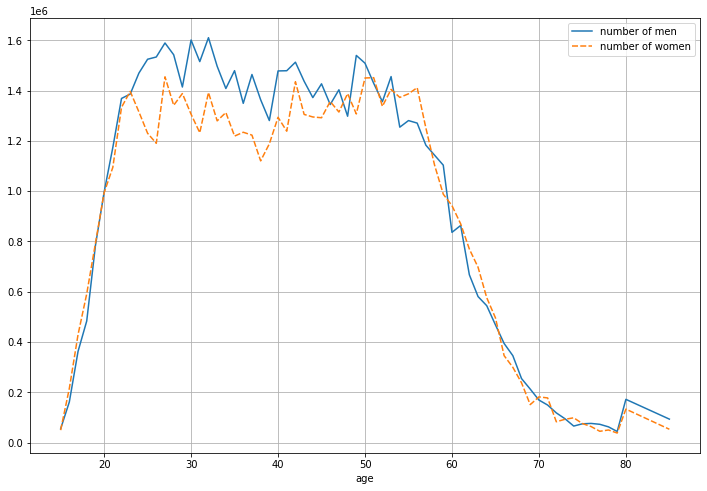

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=age_pivot[['number of men', 'number of women']])
ax.grid(True)
plt.show()

There is a consistent surplus of men in the workforce during early career years, but this gap narrows towards mid-career until there is about the same amount of women and men working at the 50 year mark, which are the peak earning years. It is worth noting that there is a small surplus of men working beyond 80 years old, which, as we saw, is when incomes are highest.  

From this we can infer that age will probably explain some of the difference in income between men and women, although the impact will probably not be very strong.

### Confounder? Workhours

Now let's focus on the impact of workhours on income.

In [ ]:
weekly_workhours_pivot = pivoter('weekly_workhours')

In [ ]:
# Pivot table without 997, the code for variable amount of weekly workhours
no_variable_pivot = weekly_workhours_pivot[weekly_workhours_pivot.index != 997]

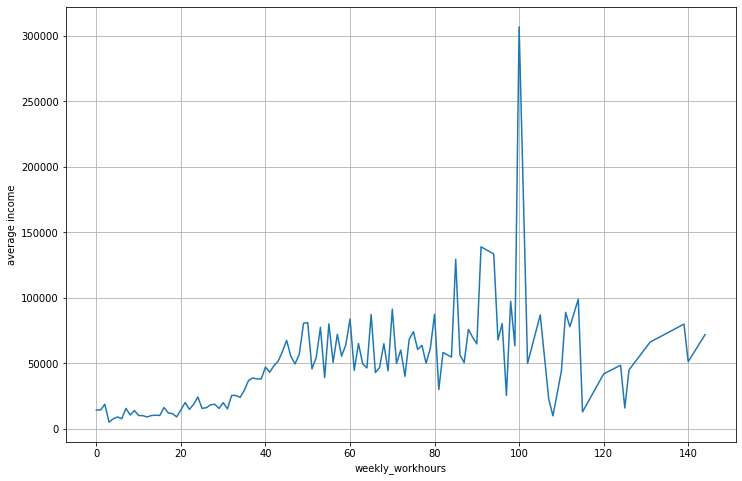

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=no_variable_pivot.index,
             y='average income',
             data=no_variable_pivot)
ax.grid(True)
plt.show()

Income steadily increases with more workhours until the 40 hours mark, after which extra work does not really seem to be correlated with extra income (except for a big spike at 100 hours which is probably caused by some skew in the income data.) The inelasticity of income past 50 workhours is probably because the income effect of working extra hours is countered by the fact that many people who work extra hours do so because of financial necessity, and therefore low incomes.

Let's check out the difference in workhours between men and women.

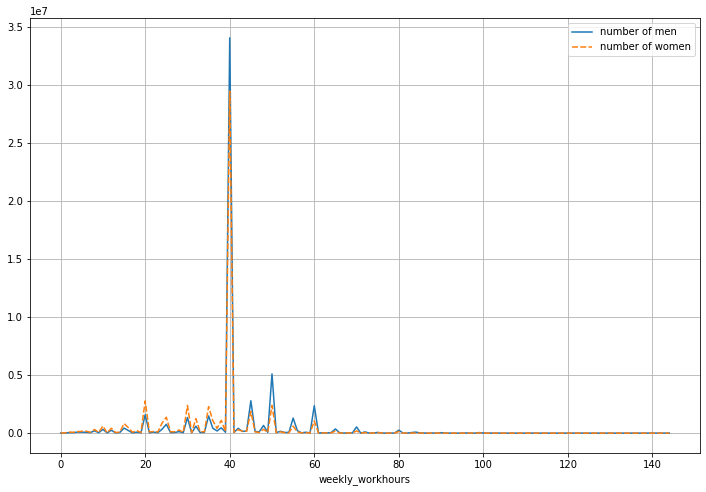

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=no_variable_pivot[['number of men', 'number of women']])
ax.grid(True)
plt.show()

Here we see that the variation in workhours is pretty much the same for men and women, however there are more women working below the 40 hour mark and more men working at and above the 40 hour mark. This will probably translate into some impact of workhours on the difference between the income and women, however the gap in workhours is small enough that the impact will probably not be very strong.

Let's take a quick look at variable hours (weekly_workhours = 997) to see if we need to include them into our analysis.

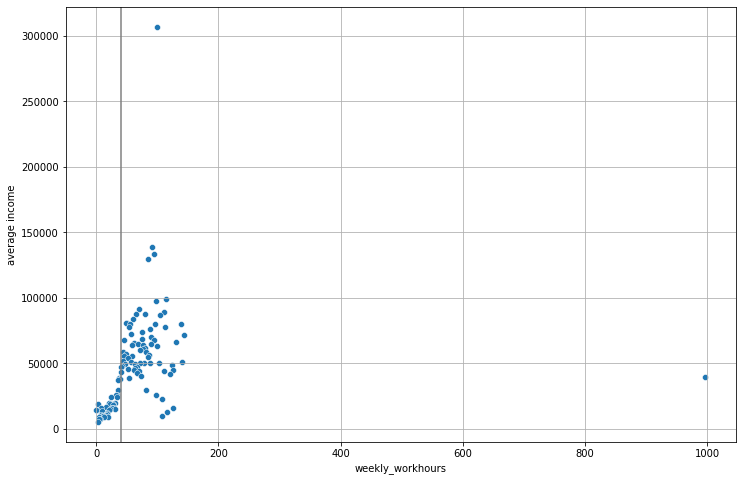

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=weekly_workhours_pivot.index,
             y='average income',
             data=weekly_workhours_pivot)
ax.grid(True)
plt.axvline(x=40,color='grey')
plt.show()

The grey bar on this chart represent the 40 hour work week mark, where we saw that most people in the population were concentrated. The scatter plot shows well how incomes stop following a uniform trend past the 40 hour mark, and the outlier at the 100 hour mark that was causing the previously observed skew.

The blue dot all the way on the right represents the average income of people working variable hours. As we can see, it is prety much comparable to the average income earned by individuals working a 40 hour work week (which is the majority of the population.)

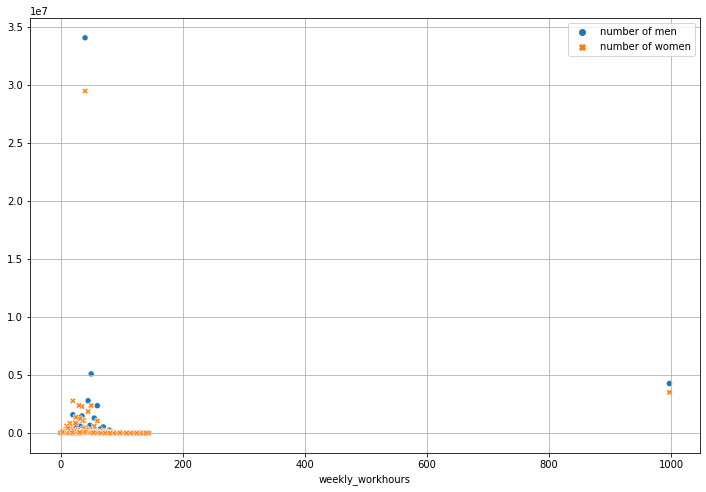

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data=weekly_workhours_pivot[['number of men', 'number of women']])
ax.grid(True)
plt.show()

Additionally, we see here that the gap between the amount of men and the amount of women working variable hours is not that great, and comparable or smaller than other gender gaps observed at different points along the x axis.

In light of this, variable workhours probably do not have a significant enough effect on the gender income gap.

### Confounder? Class of worker

In [ ]:
class_of_worker_pivot = pivoter('class_of_worker')
legible(class_of_worker_pivot)

,number of women,number of men,average income,surplus men
class_of_worker,,,,
Federal government employee,"1,529,396","1,986,263","68,025","456,867"
Local government employee,"6,079,221","4,053,050","46,495","-2,026,171"
State government employee,"3,668,181","2,562,512","46,016","-1,105,669"
Private employee,"48,918,420","55,457,314","45,192","6,538,894"


Here we see that there is a significant income advantage in being a federal government employee compared to being employed at the local or state level or in the private sector.

Because there is a small surplus of men working federal government jobs, this variable probably has a minor explanatory power on the gender income gap.

### Confounder? Occupation

In [ ]:
occupation_pivot = pivoter('occupation')
legible(occupation_pivot)

,number of women,number of men,average income,surplus men
occupation,,,,
Legal Occupations,"766,736","653,620","110,028","-113,116"
"Management, Business, Science and Arts Occupations","5,036,613","6,810,273","82,632","1,773,661"
Architecture and Engineering Occupations,"352,734","2,145,145","81,355","1,792,411"
Computer and Mathematical Occupations,"1,018,790","2,703,920","77,296","1,685,130"
"Life, Physical and Social Science Occupations","524,186","665,036","74,046","140,850"
Financial Specialists,"1,733,946","1,190,768","68,789","-543,178"
Healthcare Practitioners and Technical Occupations,"5,474,731","1,730,610","67,081","-3,744,121"
Business Operations Specialists,"1,672,030","1,213,517","62,972","-458,513"
Extraction Workers,"5,076","258,702","62,318","253,625"


This long pivot table shows a general trend: there a more men working high paying jobs, and more women working in lower paying professions. The very top of the salary ladder is especially dominated by men (except for legal occupations), while millions of surplus women engage in low paying labour, like office and administrative support, healthcare and personal care and service.

Therefore, we should expect that occupation will explain a pretty big part of the gender income gap.

### Confounder? Education

In [ ]:
education_pivot = pivoter('education')
legible(education_pivot)

,number of women,number of men,average income,surplus men
education,,,,
Very high,"7,612,671","7,366,500","89,448","-246,170"
High,"13,881,202","13,786,022","60,774","-95,181"
Advanced,"19,567,793","17,795,217","37,102","-1,772,577"
Medium,"18,462,728","23,584,365","29,997","5,121,637"
None,"73,917","149,854","20,660","75,937"
Low,"596,906","1,377,180","20,483","780,274"


Here we see an inverse effect. As education increases, income increases too. But higher education is also characterised by greater amounts of women. We should conclude that accounting for education will actually lead to a greater share of the gender income gap being attributable only to differences in gender.

### Confounder? Citizenship status

In [ ]:
citizenship_status_pivot = pivoter('citizenship_status')
legible(citizenship_status_pivot)

,number of women,number of men,average income,surplus men
citizenship_status,,,,
"U.S. citizen, born from American parents abroad","540,782","601,426","53,266","60,643"
"U.S. citizen, naturalized","4,532,969","4,556,151","51,388","23,181"
"U.S. citizen, born in the U.S.","50,759,791","51,495,964","46,762","736,174"
"U.S. citizen, born in the U.S outlying territories","291,130","312,182","38,993","21,052"
Not a U.S. citizen,"4,070,545","7,093,415","34,104","3,022,871"


Individuals who are not U.S. citizens have the lowest income with around 34000 dollars whereas U.S. citizens born from American parents abroad or naturalized U.S. citizens earn the most with over 50000 on average.

Although there is a significant surplus of men in the category 'Not a U.S. citizen', the huge majority of the population is actually in the U.S. Citizen category. This variable probably won't have much of an explanatory effect on the gender income wage gap.

### Counfounder? Birthplace

Let's build some more maps to visualise the income effect of birthplace.

In [ ]:
birthplace_pivot = pivoter('birthplace')

In [ ]:
# First we need to prepare our dataframe. Let's apply our previously defined
# alpha_3_code function to birthplace_pivot.
birthplace_pivot['CODE'] = alpha3code(birthplace_pivot.index)

# Next we load our map dataset.
world1 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Prepare for the merge.
world1 = world.rename(columns={'iso_a3': 'CODE'})

# Merge the births dataset onto the world dataset with a left join to generate
# NaN values
world1 = world1.merge(birthplace_pivot, on='CODE', how='left')

# Lastly, calculate the difference between number of women and number of men
# so

world1

,pop_est,continent,name,CODE,gdp_md_est,geometry,births,number of women,number of men,average income,surplus men
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",3.131225e+04,15497.81,15814.44,47844.310955,316.63
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",3.735036e+05,175041.77,198461.84,66711.058470,23420.07
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1.022462e+08,50754305.46,51491862.67,46763.820597,737557.21
...,...,...,...,...,...,...,...,...,...,...,...
171,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",1.061104e+04,5603.40,5007.64,71330.663158,-595.76
172,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",1.654570e+03,0.00,1654.57,40000.000000,1654.57
173,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN
174,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",1.087945e+05,65627.72,43166.74,43684.410768,-22460.98


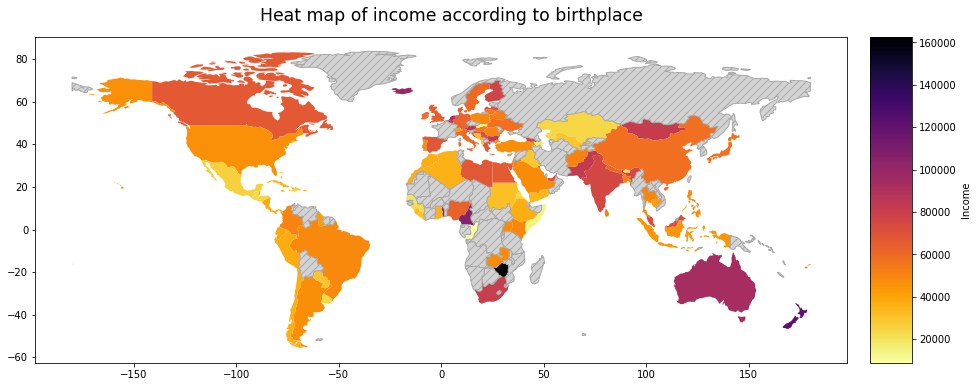

In [ ]:
# First map, incomes. Same code as in the birthplace section.

fig, ax = plt.subplots(figsize = (16, 10))

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size = '5%', pad = 0.1)

world1 = world1[world1['name'] != 'Antarctica']

world1.plot(column = 'average income',
            ax = ax,
            legend = True,
            legend_kwds = {'label' : 'Income'},
            cax = cax,
            cmap = 'inferno_r',
            missing_kwds = {
                "color": "lightgrey",
                "edgecolor": "darkgrey",
                "hatch": "///",
                "label": 'Missing values'}
            )

fig.suptitle('Heat map of income according to birthplace',
             y = 0.77,
             fontsize = 'xx-large')

plt.show()

As we can see here, U.S. workers who are born abroad actually seem to benefit from a higher income on average, aside from a few exceptions like Somalia and the Republic of the Congo. This makes sense, as immigration requirements to the United States are somewhat strict, and foreigners who are highly educated have a much better chance of gaining a work visa to come into the country than their lesser educated countrymen.

Interestingly, the birthplace that is linked with the highest incomes is Zimbabwe. A little research on Wikipedia (https://en.wikipedia.org/wiki/Zimbabwean_Americans) reveals this is due to emigration of many white Rhodesians furing the 1970s as well as the influx of students in business and technology from Zimbabwe in the 1980s, students who eventually decided to settle in the United States.

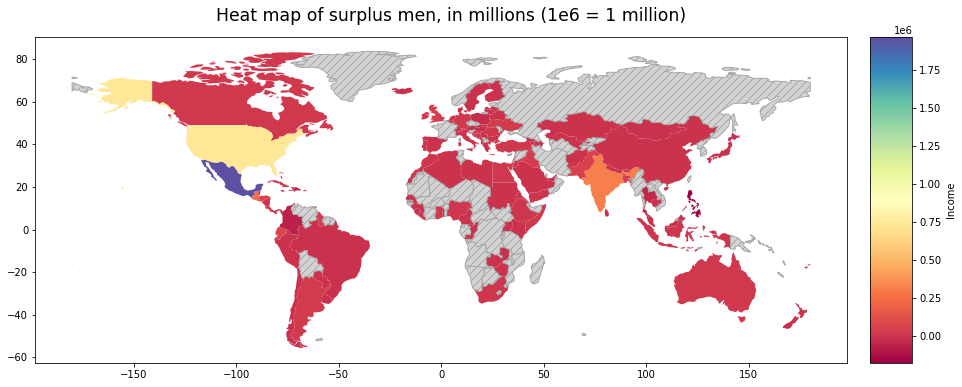

In [ ]:
# Second map, surplus men

fig, ax = plt.subplots(figsize = (16, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size = '5%', pad = 0.1)
world1 = world1[world1['name'] != 'Antarctica']
world1.plot(column = 'surplus men',
            ax = ax,
            legend = True,
            legend_kwds = {'label' : 'Income'},
            cax = cax,
            cmap = 'Spectral',
            missing_kwds = {
                "color": "lightgrey",
                "edgecolor": "darkgrey",
                "hatch": "///",
                "label": 'Missing values'}
            )
fig.suptitle('Heat map of surplus men, in millions (1e6 = 1 million)',
             y = 0.77,
             fontsize = 'xx-large')
plt.show()

The heat map of surplus men, meanwhile, reveals that most surplus men in the labour force are Mexican immigrants. They are probably working in the U.S. to support their families back in Mexico. Because we saw above that incomes for people born in Mexico are some of the lowest, the birthplace stat should actually have an inverse explanatory effect on the gender income gap and accounting for birthplace would probably leave more of the gap income gap attributable only to differences in gender.

Out of interest, let's see which countries are the biggest sources of female immigration.

In [ ]:
surplus_women = birthplace_pivot.reindex(
    birthplace_pivot.sort_values(by='surplus men', ascending=True).index)
surplus_women = surplus_women[surplus_women['surplus men'] < 0]
surplus_women[:15]

,number of women,number of men,average income,surplus men,CODE
birthplace,,,,,
Philippines,567932.28,391435.40,48301.922165,-176496.88,PHL
Jamaica,208366.10,126338.36,39390.666681,-82027.74,JAM
Colombia,190636.06,137313.41,50431.126702,-53322.65,COL
Dominican Republic,242880.55,191101.70,27273.719240,-51778.85,DOM
Thailand,81240.05,43361.02,50161.229148,-37879.03,THA
Korea,190559.92,154725.84,54433.880174,-35834.08,None
Vietnam,377238.77,349785.60,43161.690487,-27453.17,None
Panama,45525.97,19383.39,36624.608347,-26142.58,PAN
Trinidad and Tobago,65627.72,43166.74,43684.410768,-22460.98,TTO


The Philippines make the top of the list. This is because of the historical relationship between the U.S. and the Philippines that made possible large immigration into the U.S. of Filipina nurses. More on this in the Wikipedia article on Filipino-American demographics. https://en.wikipedia.org/wiki/Demographics_of_Filipino_Americans#Post_1965

### Confounder? Race

Finally, let's see what effect race have might have on the gender wage gap.

In [ ]:
race_pivot = pivoter('race')
legible(race_pivot)

,number of women,number of men,average income,surplus men
race,,,,
American Indian-Asian,224,"4,978","78,263","4,754"
White-American Indian-Hawaiian/Pacific Islander,0,"1,574","70,000","1,574"
Asian only,"3,366,815","3,699,057","54,500","332,242"
Black-Asian,"30,300","24,352","49,404","-5,947"
White,"46,943,521","51,908,243","47,258","4,964,722"
White-Asian,"168,987","155,853","44,961","-13,134"
White-Hawaiian/Pacific Islander,"23,827","27,984","39,945","4,157"
Hawaiian/Pacific Islander only,"227,888","248,013","39,715","20,124"
"Four or five races, unspecified","3,174","3,055","37,939",-119


Looking at this pivot table, we see that men are overrepresented in the labour force for high-income racial categories like 'Asian only' and 'White', while women are overrepresented in the labour force for low-income racial categories like 'Black/Negro'. Consequently, the distribution of workers according to race probably explains some part of the gender income gap.

Let's move on now to preparing our dataset tfor running weighted linear models.

## Question 6
Dummify categorical variables and extract new features if relevant.

In [ ]:
# Let's start by creating a copy of our dataset.

prep = data.copy()
prep.head()

,person_level_weight,age,sex,race,birthplace,citizenship_status,occupation,class_of_worker,weekly_workhours,education,income
0,591.14,45,Female,White,United States,"U.S. citizen, born in the U.S.",Transportation and Material Moving Occupations,Private employee,38,Advanced,22000
1,591.14,40,Male,White,United States,"U.S. citizen, born in the U.S.","Installation, Maintenance and Repair Workers",Local government employee,40,Advanced,26000
2,656.54,62,Female,White,United States,"U.S. citizen, born in the U.S.",Healthcare Practitioners and Technical Occupat...,Private employee,40,High,45000
3,656.54,63,Male,White,United States,"U.S. citizen, born in the U.S.","Education, Training and Library Occupations",State government employee,40,High,6000
4,347.43,30,Male,White,United States,"U.S. citizen, born in the U.S.","Installation, Maintenance and Repair Workers",Private employee,997,Medium,40000


### Dummify sex

We can dummify 'sex' into 1 for male and 0 for female.

In [ ]:
prep['male'] = prep['sex'].replace({'Male' : 1,
                                    'Female' : 0})
prep = prep.drop(columns=['sex'])
prep.head()

,person_level_weight,age,race,birthplace,citizenship_status,occupation,class_of_worker,weekly_workhours,education,income,male
0,591.14,45,White,United States,"U.S. citizen, born in the U.S.",Transportation and Material Moving Occupations,Private employee,38,Advanced,22000,0
1,591.14,40,White,United States,"U.S. citizen, born in the U.S.","Installation, Maintenance and Repair Workers",Local government employee,40,Advanced,26000,1
2,656.54,62,White,United States,"U.S. citizen, born in the U.S.",Healthcare Practitioners and Technical Occupat...,Private employee,40,High,45000,0
3,656.54,63,White,United States,"U.S. citizen, born in the U.S.","Education, Training and Library Occupations",State government employee,40,High,6000,1
4,347.43,30,White,United States,"U.S. citizen, born in the U.S.","Installation, Maintenance and Repair Workers",Private employee,997,Medium,40000,1


### Dummify race

Let's create four dummy variables for race:

* asian: 0 for not Asian only, 1 for Asian only
* black: 0 for not Black/Negro, 1 for Black/Negro
* white: 0 for not White, 1 for White
* other_race: 0 for Asian only, Black/Negro and White, 1 for a different race

In [ ]:
prep['asian'] = [1 if race == 'Asian only' else 0 for race in prep['race']]
prep['black'] = [1 if race == 'Black/Negro' else 0 for race in prep['race']]
prep['white'] = [1 if race == 'White' else 0 for race in prep['race']]
prep['other_race'] = [0 if race == 'Asian only' or race == 'Black/Negro'
                      or race == 'White' else 1 for race in prep['race']]
prep = prep.drop(columns=['race'])
prep.head()

,person_level_weight,age,birthplace,citizenship_status,occupation,class_of_worker,weekly_workhours,education,income,male,asian,black,white,other_race
0,591.14,45,United States,"U.S. citizen, born in the U.S.",Transportation and Material Moving Occupations,Private employee,38,Advanced,22000,0,0,0,1,0
1,591.14,40,United States,"U.S. citizen, born in the U.S.","Installation, Maintenance and Repair Workers",Local government employee,40,Advanced,26000,1,0,0,1,0
2,656.54,62,United States,"U.S. citizen, born in the U.S.",Healthcare Practitioners and Technical Occupat...,Private employee,40,High,45000,0,0,0,1,0
3,656.54,63,United States,"U.S. citizen, born in the U.S.","Education, Training and Library Occupations",State government employee,40,High,6000,1,0,0,1,0
4,347.43,30,United States,"U.S. citizen, born in the U.S.","Installation, Maintenance and Repair Workers",Private employee,997,Medium,40000,1,0,0,1,0


In [ ]:
# Check, worked!

print(prep['asian'].value_counts())
print(prep['black'].value_counts())
print(prep['white'].value_counts())
print(prep['other_race'].value_counts())

0    74536
1     4869
Name: asian, dtype: int64
0    70814
1     8591
Name: black, dtype: int64
1    63142
0    16263
Name: white, dtype: int64
0    76602
1     2803
Name: other_race, dtype: int64


### Dummify birthplace

Let's create three dummy variables for birthplace:

* us_born: 0 for not born in the U.S,  1 for born in the U.S.
* mex_born: 0 for not born in Mexico,  1 for born in Mexico
* other_born: 0 for born in the U.S. or Mexico, 1 for born elsewhere

In [ ]:
prep['us_born'] = [1 if bpl == 'United States' else 0
                   for bpl in prep['birthplace']]
prep['mex_born'] = [1 if bpl == 'Mexico' else 0
                    for bpl in prep['birthplace']]
prep['other_born'] = [0 if bpl == 'United States' or bpl == 'Mexico' else 1
                    for bpl in prep['birthplace']]
prep = prep.drop(columns=['birthplace'])
prep.head()

,person_level_weight,age,citizenship_status,occupation,class_of_worker,weekly_workhours,education,income,male,asian,black,white,other_race,us_born,mex_born,other_born
0,591.14,45,"U.S. citizen, born in the U.S.",Transportation and Material Moving Occupations,Private employee,38,Advanced,22000,0,0,0,1,0,1,0,0
1,591.14,40,"U.S. citizen, born in the U.S.","Installation, Maintenance and Repair Workers",Local government employee,40,Advanced,26000,1,0,0,1,0,1,0,0
2,656.54,62,"U.S. citizen, born in the U.S.",Healthcare Practitioners and Technical Occupat...,Private employee,40,High,45000,0,0,0,1,0,1,0,0
3,656.54,63,"U.S. citizen, born in the U.S.","Education, Training and Library Occupations",State government employee,40,High,6000,1,0,0,1,0,1,0,0
4,347.43,30,"U.S. citizen, born in the U.S.","Installation, Maintenance and Repair Workers",Private employee,997,Medium,40000,1,0,0,1,0,1,0,0


In [ ]:
# Check, worked!

print(prep['us_born'].value_counts())
print(prep['mex_born'].value_counts())
print(prep['other_born'].value_counts())

1    64815
0    14590
Name: us_born, dtype: int64
0    75073
1     4332
Name: mex_born, dtype: int64
0    69147
1    10258
Name: other_born, dtype: int64


### Dummify citizenship status

We can also dummify citizenship_status as 1 for being a U.S. citizen and 0 for not being a U.S. citizen.

In [ ]:
prep['us_citizen'] = [0 if stat == 'Not a U.S. citizen' else 1
                      for stat in prep['citizenship_status']]
prep = prep.drop(columns=['citizenship_status'])
prep.head()

,person_level_weight,age,occupation,class_of_worker,weekly_workhours,education,income,male,asian,black,white,other_race,us_born,mex_born,other_born,us_citizen
0,591.14,45,Transportation and Material Moving Occupations,Private employee,38,Advanced,22000,0,0,0,1,0,1,0,0,1
1,591.14,40,"Installation, Maintenance and Repair Workers",Local government employee,40,Advanced,26000,1,0,0,1,0,1,0,0,1
2,656.54,62,Healthcare Practitioners and Technical Occupat...,Private employee,40,High,45000,0,0,0,1,0,1,0,0,1
3,656.54,63,"Education, Training and Library Occupations",State government employee,40,High,6000,1,0,0,1,0,1,0,0,1
4,347.43,30,"Installation, Maintenance and Repair Workers",Private employee,997,Medium,40000,1,0,0,1,0,1,0,0,1


In [ ]:
# Check, worked!

prep['us_citizen'].value_counts()

1    71987
0     7418
Name: us_citizen, dtype: int64

### Dummify occupation

In [ ]:
legible(occupation_pivot)

,number of women,number of men,average income,surplus men
occupation,,,,
Legal Occupations,"766,736","653,620","110,028","-113,116"
"Management, Business, Science and Arts Occupations","5,036,613","6,810,273","82,632","1,773,661"
Architecture and Engineering Occupations,"352,734","2,145,145","81,355","1,792,411"
Computer and Mathematical Occupations,"1,018,790","2,703,920","77,296","1,685,130"
"Life, Physical and Social Science Occupations","524,186","665,036","74,046","140,850"
Financial Specialists,"1,733,946","1,190,768","68,789","-543,178"
Healthcare Practitioners and Technical Occupations,"5,474,731","1,730,610","67,081","-3,744,121"
Business Operations Specialists,"1,672,030","1,213,517","62,972","-458,513"
Extraction Workers,"5,076","258,702","62,318","253,625"


Let's dummify occupation into different variables based on income.

* vhi_pay: 1 for Legal Occupations through to Life, Physical and Social Science Occupations, 0 for the rest
* hi_pay: 1 for Financial Specialists through to Extraction Workers, 0 for the rest
* med_pay: 1 for Art, Design, Entertainment, Sports and Media Occupations through to Production Occupations, 0 for the rest
* low_pay: 1 for Transportation and Material Moving Occupations through to Office and Administrative Support Occupations, 0 for the rest
* vlow_pay: 1 for Farming, Fishing and Forestry Occupations through to Food Preperation and Serving Occupations, 0 for the rest

In [ ]:
prep['vhi_pay'] = [1 if j == 'Legal Occupations'
                   or j == 'Management, Business, Science and Arts Occupations'
                   or j == 'Architecture and Engineering Occupations'
                   or j == 'Computer and Mathematical Occupations'
                   or j == 'Life, Physical and Social Science Occupations'
                   else 0 for j in prep['occupation']]
prep['hi_pay'] = [1 if j == 'Financial Specialists'
                  or j == 'Healthcare Practitioners and Technical Occupations'
                  or j == 'Business Operations Specialists'
                  or j == 'Extraction Workers'
                  else 0 for j in prep['occupation']]
prep['med_pay'] = [1 if j == 'Arts, Design, Entertainment, Sports and Media ' +
                   'Occupations'
                   or j == 'Protective Service Occupations'
                   or j == 'Installation, Maintenance and Repair Workers'
                   or j == 'Education, Training and Library Occupations'
                   or j == 'Sales and Related Occupations'
                   or j == 'Construction, and Extraction Occupations'
                   or j == 'Community and Social Services Occupations'
                   or j == 'Production Occupations'
                   else 0 for j in prep['occupation']]
prep['low_pay'] = [1 if j == 'Transportation and Material Moving Occupations'
                   or j == 'Office and Administrative Support Occupations'
                   else 0 for j in prep['occupation']]
prep['vlow_pay'] = [1 if j == 'Farming, Fishing, and Forestry Occupations'
                    or j == 'Healthcare Support Occupations'
                    or j == 'Building and Grounds Cleaning and Maintenance ' +
                    'Occupations'
                    or j == 'Personal Care and Service Occupations'
                    or j == 'Food Preparation and Serving Occupations'
                    else 0 for j in prep['occupation']]
prep = prep.drop(columns=['occupation'])
prep.head()

,person_level_weight,age,class_of_worker,weekly_workhours,education,income,male,asian,black,white,other_race,us_born,mex_born,other_born,us_citizen,vhi_pay,hi_pay,med_pay,low_pay,vlow_pay
0,591.14,45,Private employee,38,Advanced,22000,0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,591.14,40,Local government employee,40,Advanced,26000,1,0,0,1,0,1,0,0,1,0,0,1,0,0
2,656.54,62,Private employee,40,High,45000,0,0,0,1,0,1,0,0,1,0,1,0,0,0
3,656.54,63,State government employee,40,High,6000,1,0,0,1,0,1,0,0,1,0,0,1,0,0
4,347.43,30,Private employee,997,Medium,40000,1,0,0,1,0,1,0,0,1,0,0,1,0,0


In [ ]:
# Check, worked!

print(prep['vhi_pay'].value_counts())
print(prep['hi_pay'].value_counts())
print(prep['med_pay'].value_counts())
print(prep['low_pay'].value_counts())
print(prep['vlow_pay'].value_counts())

0    66229
1    13176
Name: vhi_pay, dtype: int64
0    70835
1     8570
Name: hi_pay, dtype: int64
0    50557
1    28848
Name: med_pay, dtype: int64
0    63843
1    15562
Name: low_pay, dtype: int64
0    66156
1    13249
Name: vlow_pay, dtype: int64


### Dummify class of worker

Let's dummify class_of_worker as 0 for non-federal employee and 1 for federal employee

In [ ]:
prep['federal'] = [1 if cl == 'Federal government employee' else 0
                   for cl in prep['class_of_worker']]
prep = prep.drop(columns=['class_of_worker'])
prep['federal'].value_counts()

0    76830
1     2575
Name: federal, dtype: int64

### Dummify education

For education, we can also create three dummy variables:

* no_college: 0 for Advanced, High, Very High, 1 for Low, Medium
* some_college: 0 for Low, Medium, High, Very high, 1 for Advanced
* more_college: 0 for Low, Medium, Advanced, 1 for High, Very high

In [ ]:
prep['more_college'] = [1 if e == 'High' or e == 'Very High' else 0
                        for e in prep['education']]
prep['some_college'] = [1 if e == 'Advanced' else 0 for e in prep['education']]
prep['no_college'] = [1 if e == 'Low' or e == 'Medium' else 0
                      for e in prep['education']]
prep = prep.drop(columns=['education'])
prep.head()

,person_level_weight,age,weekly_workhours,income,male,asian,black,white,other_race,us_born,mex_born,other_born,us_citizen,vhi_pay,hi_pay,med_pay,low_pay,vlow_pay,federal,more_college,some_college,no_college
0,591.14,45,38,22000,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1,591.14,40,40,26000,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
2,656.54,62,40,45000,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0
3,656.54,63,40,6000,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0
4,347.43,30,997,40000,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1


### Wrap-up

Let's remove the datapoints with variable income. As we saw earlier, they shouldn't have much of an impact on the difference in incomes between men and women. They will, however, meaninglessly distort the actual coefficient for workhours in our model (because of their assigned value 997.)

In [ ]:
len(prep)

79405

In [ ]:
prep = prep[prep['weekly_workhours'] != 997]

In [ ]:
len(prep)

74552

Lastly, let's just rename a few columns for simplification.

In [ ]:
prep = prep.rename(columns={'person_level_weight': 'weight',
                            'weekly_workhours': 'workhours'})
prep.head()

,weight,age,workhours,income,male,asian,black,white,other_race,us_born,mex_born,other_born,us_citizen,vhi_pay,hi_pay,med_pay,low_pay,vlow_pay,federal,more_college,some_college,no_college
0,591.14,45,38,22000,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1,591.14,40,40,26000,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
2,656.54,62,40,45000,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0
3,656.54,63,40,6000,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0
5,349.99,27,11,7500,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1


## Question 7
Using weighted GLM, identify whether there is a gender wage gap after adjusting for other explanatory variables such as education and occupation. Use ASCEWT (here: person_level_weight) as a weight. Are your results different from (3)? Interpret the GLM output & conclude.

The following function for adding labels above bars is used below and is adapted from this stackoverflow post: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart.

In [ ]:
def add_value_labels(ax, spacing=5):
    # Set value of current bar
    bar = 0
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        # Number of points between bar and label.
        space = 8
        # Vertical alignment for positive values
        va = 'bottom'
        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        # Use bar name as label
        label = sorted_fullmodel_labels[bar]
        # Update bar value
        bar += 1
        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

Let's run our linear regressions.

First, just a simple model with male as the only predictor to see how much of a gap there is to account for.

In [ ]:
import statsmodels.api as sm
dependent = prep['income']

In [ ]:
# Simple model with just the male variable as predictor

justmale = prep['male']
justmale_c = sm.add_constant(justmale)
simplemodel = sm.WLS(dependent,
                     justmale_c,
                     weights=prep['weight'])
simplemodel = simplemodel.fit()
simplemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.020
Model:                            WLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1535.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:04:42   Log-Likelihood:            -9.3511e+05
No. Observations:               74552   AIC:                         1.870e+06
Df Residuals:                   74550   BIC:                         1.870e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.761e+04    313.734    119.876      0.000     3.7e+04    3.82e+04
male        1.715e+04    437.880     39.177      0.000    1.63e+04     1.8e+04
==============================================================================
Omnibus:                   119906.480   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        113736960.174
Skew:                          10.476   Prob(JB):                         0.00
Kurtosis:                     193.199   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now that we've removed the rows with variable income, this simple weighted model returns a gender income gap of 17150 dollars (this is the coefficient for male, which represents the difference between the value when male is set to 0 (i.e. female) and when male is set to 1 (i.e. male.)

This coefficient is statistically significant at the 99.99% confidence level. Looking at our R-squared, however, this parsimonious model explains only 2 % of the variance in income.

Let's add our other variables now to build a model that better predicts income.

In [ ]:
# Full model with all variables as predictors (except baseline variables)

allindependent = prep[['male', 'age', 'workhours', 'asian', 'black', 'white',
                       'mex_born', 'other_born', 'us_citizen', 'vhi_pay',
                       'hi_pay', 'med_pay', 'low_pay', 'federal',
                       'more_college', 'some_college']]
allindependent_c = sm.add_constant(allindependent)
fullmodel = sm.WLS(dependent,
                   allindependent_c,
                   weights=prep['weight'])
fullmodel = fullmodel.fit()
fullmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.193
Model:                            WLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     1116.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:04:42   Log-Likelihood:            -9.2786e+05
No. Observations:               74552   AIC:                         1.856e+06
Df Residuals:                   74535   BIC:                         1.856e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.683e+04   1757.299    -26.648      0.000   -5.03e+04   -4.34e+04
male          1.164e+04    415.902     27.991      0.000    1.08e+04    1.25e+04
age            545.8391     14.782     36.926      0.000     516.866     574.812
workhours     1026.1467     18.706     54.857      0.000     989.483    1062.810
asian         6960.6525   1493.778      4.660      0.000    4032.855    9888.450
black        -1937.8958   1306.109     -1.484      0.138   -4497.863     622.071
white         4119.7646   1194.485      3.449      0.001    1778.579    6460.951
mex_born     -9015.0976   1168.420     -7.716      0.000   -1.13e+04   -6724.999
other_born    1685.8673    801.994      2.102      0.036     113.963    3257.771
us_citizen    6674.4563    987.502      6.759      0.000    4738.957    8609.956
vhi_pay       4.283e+04    743.354     57.624      0.000    4.14e+04    4.43e+04
hi_pay        3.352e+04    815.275     41.118      0.000    3.19e+04    3.51e+04
med_pay        1.03e+04    617.601     16.674      0.000    9087.673    1.15e+04
low_pay       5034.1071    679.919      7.404      0.000    3701.468    6366.746
federal        1.23e+04   1192.053     10.321      0.000    9967.304    1.46e+04
more_college  4353.5890    529.389      8.224      0.000    3315.988    5391.190
some_college -5776.5823    472.256    -12.232      0.000   -6702.202   -4850.963
==============================================================================
Omnibus:                   130390.522   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        193374874.025
Skew:                          12.375   Prob(JB):                         0.00
Kurtosis:                     251.273   Cond. No.                         744.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This improved model reaches an R-squared of 0.192, explaining about 20% of the variation in income. This is much better than our previous model. Each predictor has a non-neglibile coefficient and all are statistically significant at the 99.99% confidence level, except 'us_born' which is statistically signigicant at the 96% confidence level, and 'black' which cannot be considered to have a statistically significant effect (this is probably due to some level of multicolinearity between 'black' and the variables for sex and high income.)

With all of these predictors introduced to account for variations in income, the impact of 'male' remains statistically significant at the 99.99% confidence level with a coefficient that is still 1.164*10e4. Despite our best efforts, we are still left with a gender income gap of 11640 dollars that can only be accounted for by differences in gender.

In [ ]:
# Checking statsmodel was used correctly: results are consistent with scikit

import sklearn
from sklearn.linear_model import LinearRegression

fullmodel_scikit = LinearRegression().fit(allindependent,
                                          dependent,
                                          sample_weight=prep['weight'])
fullmodel_scikit.score(allindependent,
                       dependent,
                       sample_weight=prep['weight'])

print(f'Coefficients: {fullmodel_scikit.coef_}')
print(f'Intercept: {fullmodel_scikit.intercept_}')
print(f'R^2 score: {fullmodel_scikit.score(allindependent, prep["income"])}')

Coefficients: [11641.35610056   545.83905598  1026.14666856  6960.65251217
 -1937.8958033   4119.76459727 -9015.09763861  1685.86732139
  6674.4562766  42834.90883454 33522.09169727 10298.16797844
  5034.10705765 12303.7227641   4353.58903025 -5776.58231677]
Intercept: -46828.90881486705
R^2 score: 0.20072776069837217


Finally, let's create a bar plot to better visualise our coefficients

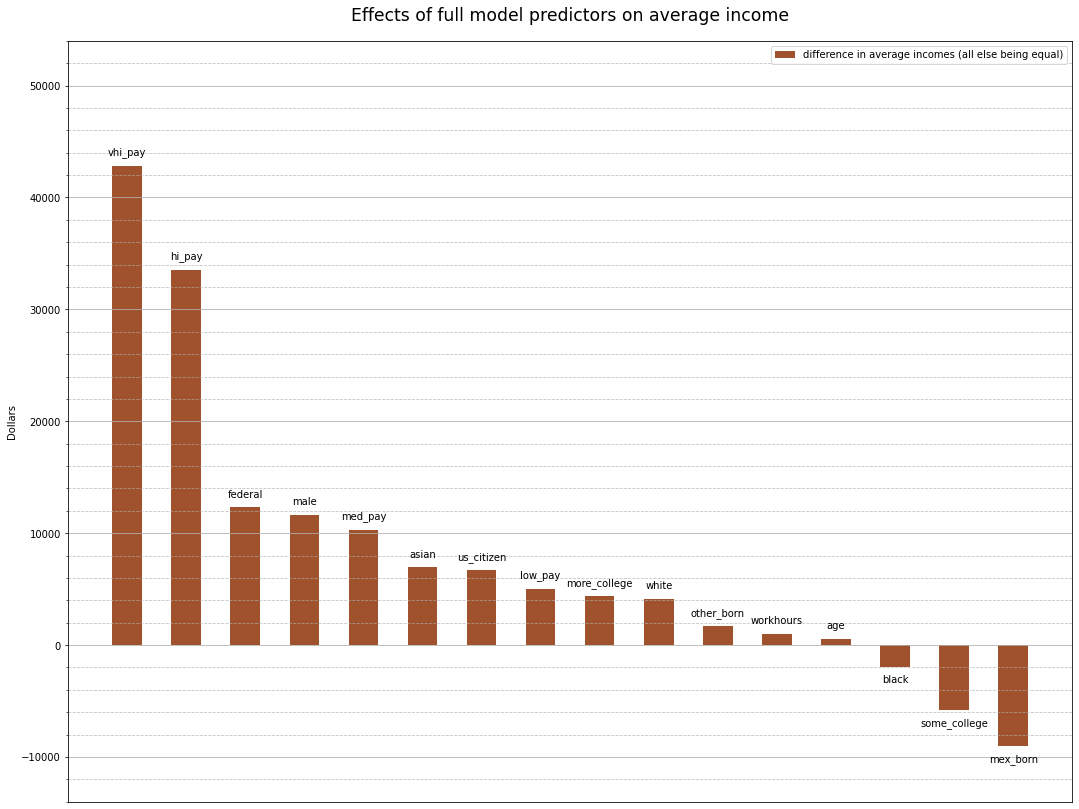

In [ ]:
# Create a dictionary of coefficients and labels to easily look up labels
fullmodel_dict = dict(zip(fullmodel.params[1:],
                          allindependent_c.columns.values[1:]))
# Sort coefficients from largest to smallest
sorted_fullmodel_values = -np.sort(-fullmodel.params[1:])
# Apply the dictionary to get a matching list of sorted labels
sorted_fullmodel_labels = [fullmodel_dict[value] for value
                           in sorted_fullmodel_values]

coef_v = pd.DataFrame({'labels': sorted_fullmodel_labels,
                       'difference in average incomes (all else being equal)':
                       sorted_fullmodel_values})

coef_v.plot.bar(x='labels',
             color='sienna',
             figsize=(18, 14))

plt.ylabel('Dollars')
plt.xlabel('')
plt.title('Effects of full model predictors on average income',
          fontsize = 'xx-large',
          pad = 20)

plt.xticks(rotation=40, ha='right')

ax = plt.gca()
ax.set_yticks(range(-10000, 60000, 10000), minor=False)
ax.set_yticks(range(-14000, 56000, 2000), minor=True)
ax.set_xticks(range(-1, 17, 1), minor=False)
ax.yaxis.grid(True, which='major')
ax.yaxis.grid(True, which='minor', linestyle='dashed', alpha=0.75)
plt.tick_params(axis='x',
                which='both',
                bottom=False, top=False, labelbottom=False)

add_value_labels(ax)

plt.show()

Important note: this bar plot represents the impact that each variable has on average income, holding all other variables equal - it does not represent the explanatory power that each variable has on the gender income gap. This chart is merely a way to place the unexplained remainder of the gender income gap within the wider context.

Here, the fourth bar from left, labelled 'male', represents that unexplained portion left in the gender income gap, a portion that can only be assigned to differences in gender. It stands as the fourth largest contributer of differences in average incomes between men and women, and is a larger source of inequality than citizenship or even higher education.

The problematic nature of this type of inequality, from the point of view of social justice, is evident. How can we justify such a level of disparity between incomes solely on the basis of gender?

# Conclusion

Let's compute this unexplained gap as a percentage of the measured difference in weighted average incomes between men and women.

In [ ]:
wa_income_men_prep = (
    sum(prep[prep.male == 1].income * prep[prep.male == 1].weight)
    /
    sum(prep[prep.male == 1].weight)
)
wa_income_women_prep = (
    sum(prep[prep.male == 0].income * prep[prep.male == 0].weight)
    /
    sum(prep[prep.male == 0].weight)
)
diff_income_sex_prep = wa_income_men_prep - wa_income_women_prep
pct_gap = wa_income_women_prep / wa_income_men_prep * 100
pct_unexplained = (11640 / diff_income_sex_prep) * 100
print('In 2013, women earned ' + str(round(pct_gap)) + ' % of what a man ' +
      'earned.')
print(str(round(pct_unexplained)) + ' % of that gap remains unaccounted for ' +
      'by our model.')

In 2013, women earned 69 % of what a man earned.
68 % of that gap remains unaccounted for by our model.


Our analysis reveals a very distinct gender wage gap for the US in 2013, with women earning only 69% of what a man earned. If women were to be paid the same as men, this would be equivalent to stopping the payments for women in mid-August.

After accounting for all possible explanatory factors, 68% of that gap remained unaccounted for. To explain this remainder, we have to turn to other possible factors that could not be measured, such as differences in salary negotiating styles between men and women or simply blatant gender discrimination.

It is worth pointing out that more advanced studies have found that women earn closer to 80% of what a man earns, and that the unexplained portion of the wage gap is more like 3% - 6%, rather than 68%. (https://en.wikipedia.org/wiki/Gender_pay_gap_in_the_United_States) It is possible that our model was simply underspecified and lacked additional explanatory variables, or perhaps we oversimplified the data during the recoding and dummifying processes.

Additionally, we only analysed the 2013 census. More data could have helped us build a better model, and it would have been interesting to see whether the gender income gap has decreased or increased over time.